# Top 15 MF + BP GOs Downregulated DEGs Shared and Unique to CX and CB

### Import Statements

In [2]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns

### BP Data

In [14]:
bp_cx_cb_data = pd.read_csv("bp_cx_cb_down_copy.csv")
print(bp_cx_cb_data.shape)
bp_cx_cb_data.head()

(1163, 15)


,source,term_name,term_id,term_size,effective_domain_size,p_adj_color,adjusted_p_value__CX_Down,query_size__CX_Down,intersection_size__CX_Down,gene_ratio_CX_Down,p_adj_color.1,adjusted_p_value__CB_Down,query_size__CB_Down,intersection_size__CB_Down,gene_ratio_CB_Down
0,GO:BP,localization,GO:0051179,6297,27543,5.280000e-87,5.280000e-87,1642,733,0.446407,9.590000e-28,9.590000e-28,779,321,0.412067
1,GO:BP,system development,GO:0048731,4533,27543,5.840000e-87,5.840000e-87,1756,624,0.355353,6.570000e-27,6.570000e-27,851,273,0.320799
2,GO:BP,nervous system development,GO:0007399,2479,27543,3.040000e-85,3.040000e-85,1693,419,0.247490,3.130000e-37,3.130000e-37,811,199,0.245376
3,GO:BP,multicellular organism development,GO:0007275,5045,27543,1.040000e-78,1.040000e-78,1752,649,0.370434,7.100000e-25,7.100000e-25,851,288,0.338425
4,GO:BP,anatomical structure development,GO:0048856,6186,27543,1.090000e-77,1.090000e-77,1756,740,0.421412,1.220000e-19,1.220000e-19,851,316,0.371328


In [15]:
bp_cx_cb_data = bp_cx_cb_data[(bp_cx_cb_data.term_size < 5000) & (bp_cx_cb_data.term_size > 8)]
bp_cx_cb_data.shape

(1113, 15)

In [44]:
bp_unique_cx = bp_cx_cb_data[(bp_cx_cb_data.adjusted_p_value__CX_Down < 0.05) 
                       & (bp_cx_cb_data.adjusted_p_value__CB_Down >= 0.05)].sort_values(by="adjusted_p_value__CX_Down")
bp_unique_cx["region"] = "CX"
bp_unique_cx["analysis"] = "unique_cx"
print(bp_unique_cx.shape)
bp_unique_cx.head()

(714, 17)


,source,term_name,term_id,term_size,effective_domain_size,p_adj_color,adjusted_p_value__CX_Down,query_size__CX_Down,intersection_size__CX_Down,gene_ratio_CX_Down,p_adj_color.1,adjusted_p_value__CB_Down,query_size__CB_Down,intersection_size__CB_Down,gene_ratio_CB_Down,region,analysis
71,GO:BP,phosphorus metabolic process,GO:0006793,2797,27543,1.200000e-36,1.200000e-36,1756,358,0.203872,0.435660,0.435660,868,121,0.139401,CX,unique_cx
74,GO:BP,phosphate-containing compound metabolic process,GO:0006796,2777,27543,3.680000e-36,3.680000e-36,1756,355,0.202164,0.485442,0.485442,868,120,0.138249,CX,unique_cx
79,GO:BP,postsynapse organization,GO:0099173,209,27543,5.700000e-35,5.700000e-35,1549,73,0.047127,0.336981,0.336981,807,17,0.021066,CX,unique_cx
88,GO:BP,phosphorylation,GO:0016310,1936,27543,4.030000e-32,4.030000e-32,1756,269,0.153189,0.094438,0.094438,293,40,0.136519,CX,unique_cx
102,GO:BP,protein modification process,GO:0036211,3707,27543,2.270000e-28,2.270000e-28,1738,408,0.234753,1.000000,1.000000,868,144,0.165899,CX,unique_cx


In [45]:
bp_unique_cb = bp_cx_cb_data[(bp_cx_cb_data.adjusted_p_value__CB_Down < 0.05) 
                       & (bp_cx_cb_data.adjusted_p_value__CX_Down >= 0.05)].sort_values(by="adjusted_p_value__CB_Down")
bp_unique_cb["region"] = "CB"
bp_unique_cb["analysis"] = "unique_cb"
print(bp_unique_cb.shape)
bp_unique_cb.head()

(64, 17)


,source,term_name,term_id,term_size,effective_domain_size,p_adj_color,adjusted_p_value__CX_Down,query_size__CX_Down,intersection_size__CX_Down,gene_ratio_CX_Down,p_adj_color.1,adjusted_p_value__CB_Down,query_size__CB_Down,intersection_size__CB_Down,gene_ratio_CB_Down,region,analysis
225,GO:BP,neuropeptide signaling pathway,GO:0007218,107,27543,0.858437,0.858437,1708,17,0.009953,1.260000e-15,1.260000e-15,671,26,0.038748,CB,unique_cb
357,GO:BP,feeding behavior,GO:0007631,128,27543,0.334440,0.334440,1708,20,0.011710,6.450000e-10,6.450000e-10,577,21,0.036395,CB,unique_cb
497,GO:BP,phospholipase C-activating G protein-coupled r...,GO:0007200,98,27543,1.000000,1.000000,1736,12,0.006912,7.590000e-07,7.590000e-07,791,18,0.022756,CB,unique_cb
503,GO:BP,cellular response to dopamine,GO:1903351,88,27543,0.261425,0.261425,1352,14,0.010355,9.660000e-07,9.660000e-07,398,13,0.032663,CB,unique_cb
505,GO:BP,response to dopamine,GO:1903350,89,27543,0.296388,0.296388,1352,14,0.010355,1.120000e-06,1.120000e-06,398,13,0.032663,CB,unique_cb


In [46]:
bp_unique_cx[1:6].to_csv("bp_unique_cx_down.csv")
bp_unique_cb[1:6].to_csv("bp_unique_cb_down.csv")

In [46]:
bp_shared = bp_cx_cb_data[(bp_cx_cb_data.adjusted_p_value__CX_Down < 0.05) 
                          & (bp_cx_cb_data.adjusted_p_value__CB_Down < 0.05)]
bp_shared["adjusted_p_value"] = bp_shared.adjusted_p_value__CX_Down + bp_shared.adjusted_p_value__CB_Down
bp_shared = bp_shared.sort_values(by="adjusted_p_value")

/var/folders/4w/6x4glmd95f97_1j94ktzprrm0000gn/T/ipykernel_49062/2626204493.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bp_shared["adjusted_p_value"] = bp_shared.adjusted_p_value__CX_Down + bp_shared.adjusted_p_value__CB_Down


In [59]:
bp_shared[1:6].to_csv("bp_shared_down.csv")

In [35]:
bp_master = pd.read_csv("bp_master_down.csv")
print(bp_master.shape)
bp_master.pop("Unnamed: 0")
bp_master.head()

(30, 13)


,source,term_name,term_id,term_size,effective_domain_size,p_adj_color,adjusted_p_value,query_size__1_Down,intersection_size__1_Down,gene_ratio,region,analysis
0,GO:BP,trans-synaptic signaling,GO:0099537,864,27543,1.140000e-69,1.140000e-69,1416,196,0.138418,1,shared
1,GO:BP,cell-cell signaling,GO:0007267,1690,27543,2.060000e-76,2.060000e-76,1397,289,0.206872,1,shared
2,GO:BP,anterograde trans-synaptic signaling,GO:0098916,856,27543,2.930000e-67,2.930000e-67,1416,192,0.135593,1,shared
3,GO:BP,chemical synaptic transmission,GO:0007268,856,27543,2.930000e-67,2.930000e-67,1416,192,0.135593,1,shared
4,GO:BP,nervous system development,GO:0007399,2479,27543,3.040000e-85,3.040000e-85,1693,419,0.247490,1,shared


/var/folders/4w/6x4glmd95f97_1j94ktzprrm0000gn/T/ipykernel_55335/712590564.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', '', 'CX', '', 'CB', '', ''])


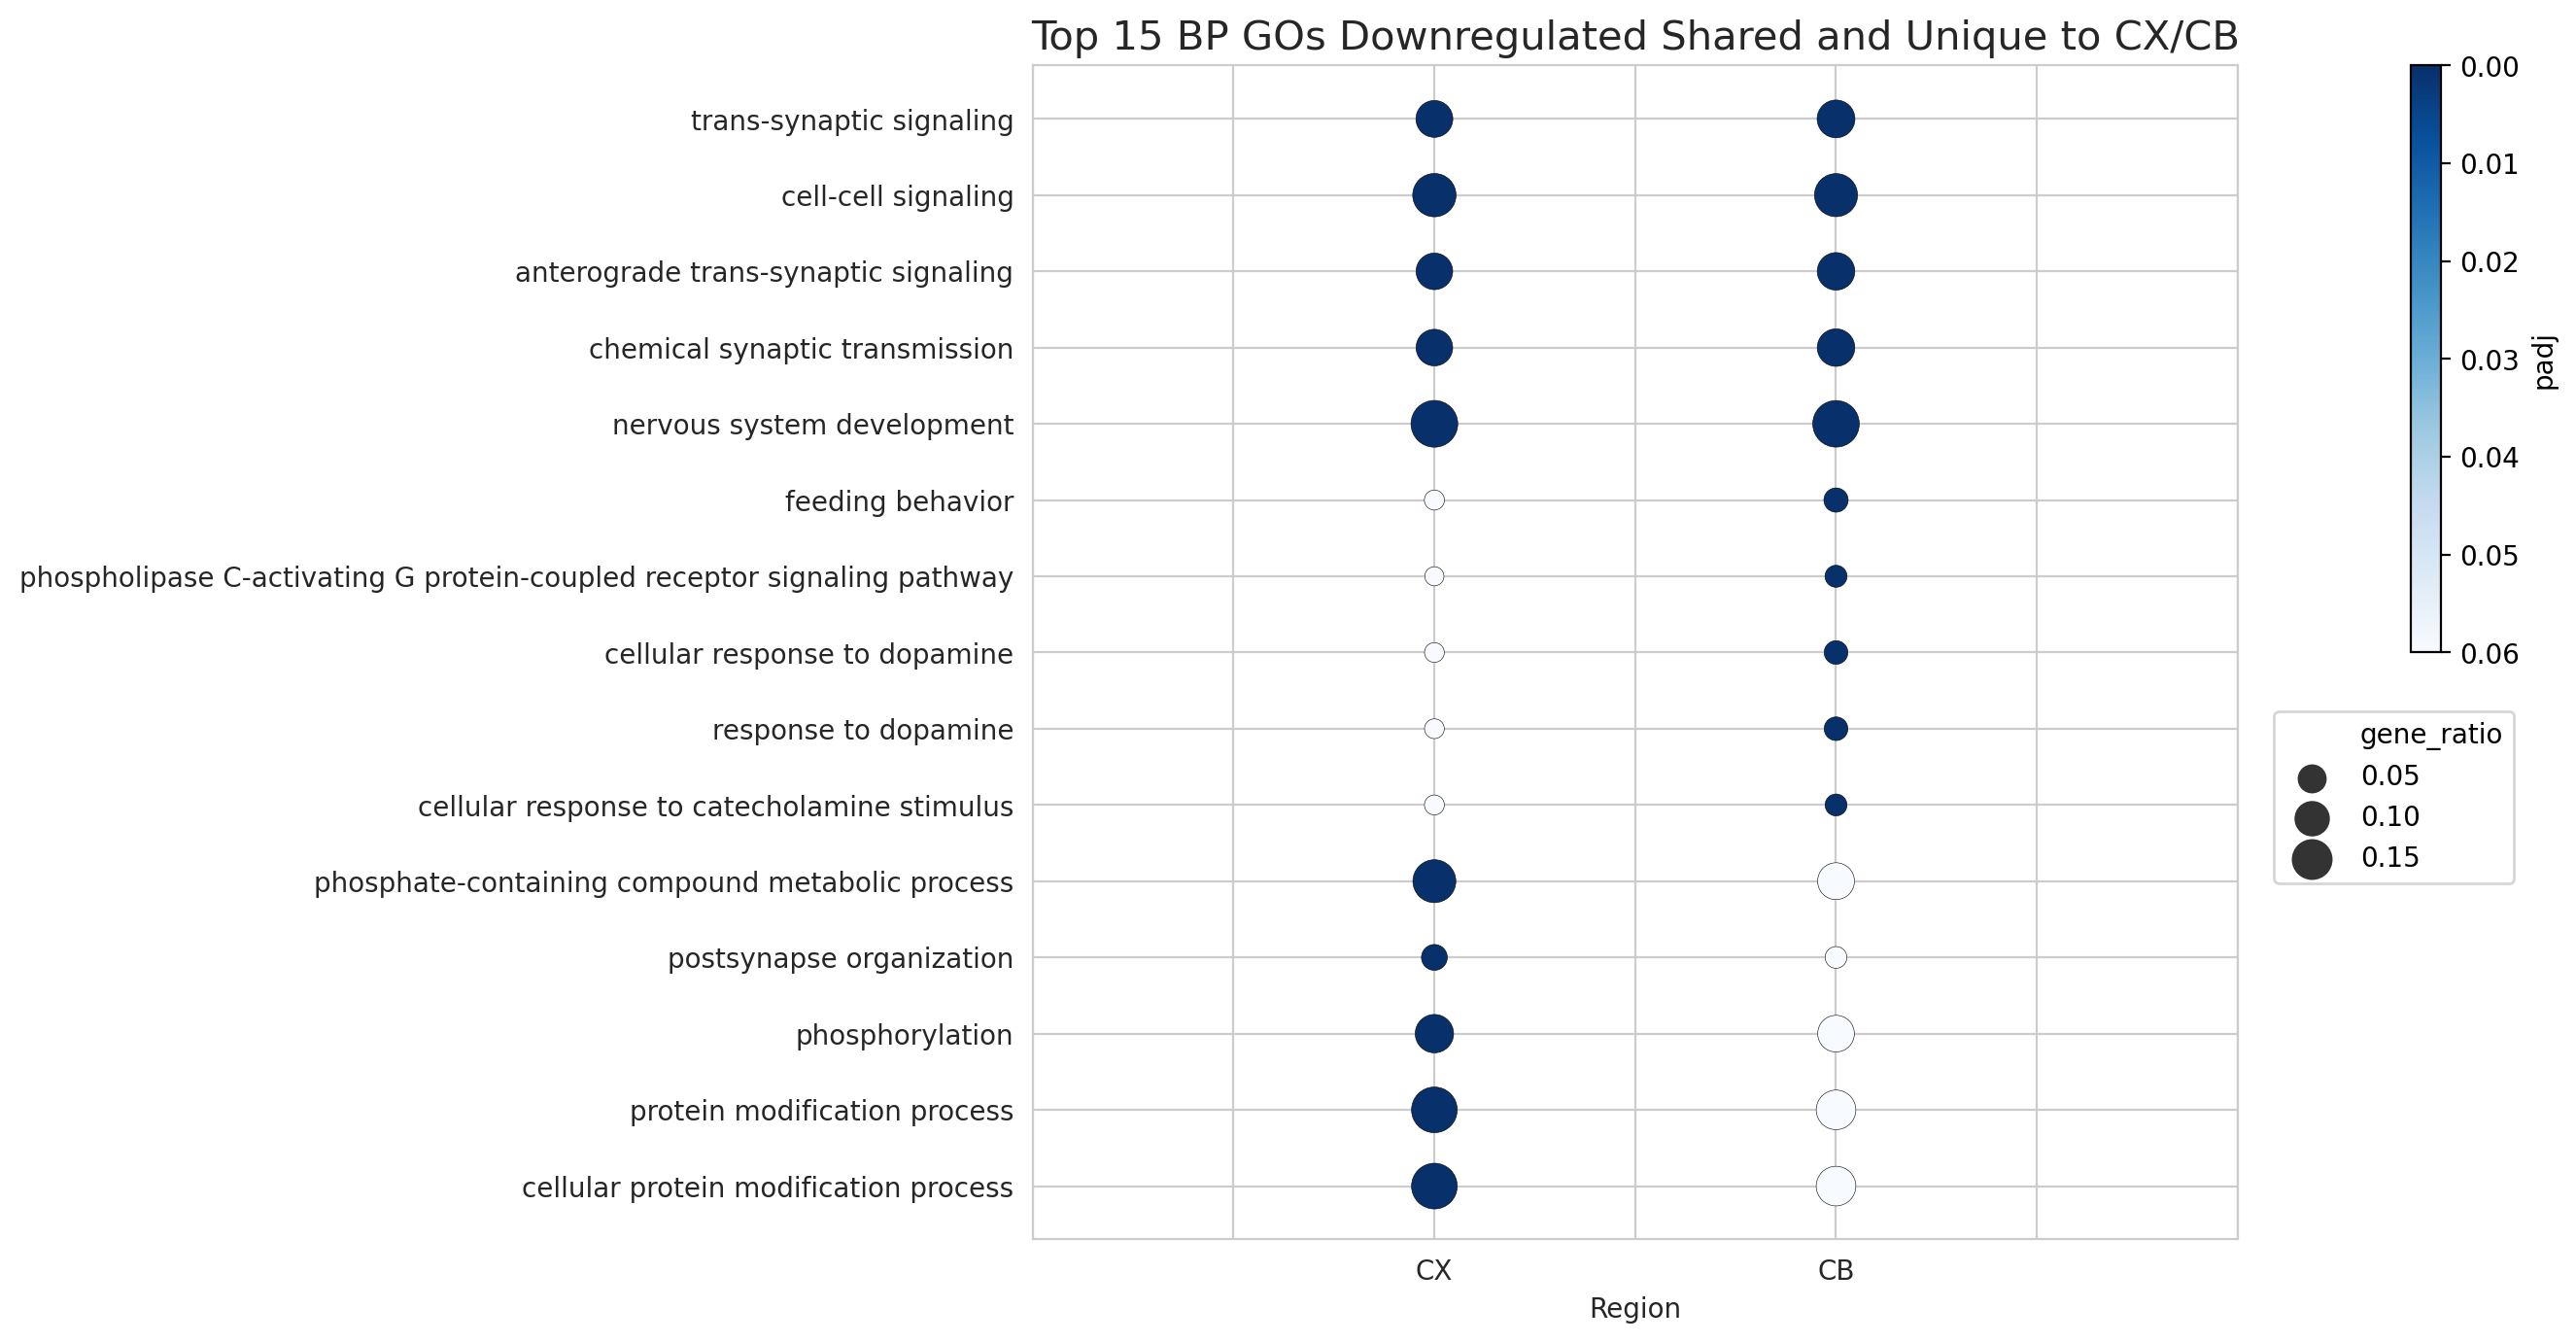

In [36]:
plt.figure(figsize=(10, 8), dpi=200)

norm = colors.Normalize(vmin=0, vmax=0.06)

with sns.axes_style('whitegrid'):
    ax = sns.scatterplot(data=bp_master, 
                         x="region", 
                         y="term_name", 
                         hue="adjusted_p_value", 
                         size="gene_ratio", 
                         sizes=(50, 300),
                         style="analysis",
                         markers=["o", "o", "o"], 
                         palette="Blues_r", 
                         hue_norm=norm, 
                         edgecolor="black", 
                         linewidth=0.2)
    
sm = plt.cm.ScalarMappable(cmap="Blues_r", norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
cbar = ax.figure.colorbar(sm, label="padj", shrink=0.5, anchor=(0.5, 1.0), orientation='vertical') 
cbar.ax.invert_yaxis()

ax.set(xlim=(0, 3), xlabel='Region', ylabel="")
ax.set_xticklabels(['', '', 'CX', '', 'CB', '', ''])

# Set legend position to be outside of graph
h,l = ax.get_legend_handles_labels()
plt.legend(h[6:10], l[6:10], bbox_to_anchor=(1.03, 0.45), loc='upper left', borderaxespad=0)

# Set title of graph
plt.title("Top 15 BP GOs Downregulated Shared and Unique to CX/CB", size=15)

plt.savefig("Top_15_BP_GOs_Down_Shared_and_Unique.pdf", bbox_inches='tight')

plt.show(ax)

### MF Data

In [9]:
mf_cx_cb_data = pd.read_csv("mf_cx_cb_down_copy.csv")
print(mf_cx_cb_data.shape)
mf_cx_cb_data.head()

(217, 15)


,source,term_name,term_id,term_size,effective_domain_size,p_adj_color,adjusted_p_value__CX_Down,query_size__CX_Down,intersection_size__CX_Down,gene_ratio_CX_Down,p_adj_color.1,adjusted_p_value__CB_Down,query_size__CB_Down,intersection_size__CB_Down,gene_ratio_CB_Down
0,GO:MF,protein binding,GO:0005515,10481,25412,1.740000e-102,1.740000e-102,1754,1160,0.661345,4.380000e-26,4.380000e-26,876,522,0.595890
1,GO:MF,binding,GO:0005488,16232,25412,1.010000e-48,1.010000e-48,1739,1390,0.799310,3.180000e-08,3.180000e-08,876,648,0.739726
2,GO:MF,metal ion transmembrane transporter activity,GO:0046873,417,25412,8.830000e-36,8.830000e-36,1632,110,0.067402,2.580000e-18,2.580000e-18,874,60,0.068650
3,GO:MF,gated channel activity,GO:0022836,324,25412,1.650000e-32,1.650000e-32,1626,92,0.056581,4.650000e-32,4.650000e-32,874,69,0.078947
4,GO:MF,voltage-gated ion channel activity,GO:0005244,190,25412,2.320000e-32,2.320000e-32,1626,70,0.043050,2.470000e-26,2.470000e-26,874,49,0.056064


In [10]:
mf_cx_cb_data = mf_cx_cb_data[(mf_cx_cb_data.term_size < 5000) & (mf_cx_cb_data.term_size > 8)]
mf_cx_cb_data.shape

(199, 15)

In [64]:
mf_unique_cx = mf_cx_cb_data[(mf_cx_cb_data.adjusted_p_value__CX_Down < 0.05) 
                       & (mf_cx_cb_data.adjusted_p_value__CB_Down >= 0.05)].sort_values(by="adjusted_p_value__CX_Down")
mf_unique_cx["region"] = "CX"
mf_unique_cx["analysis"] = "unique_cx"
print(mf_unique_cx.shape)
mf_unique_cx.head()

(119, 17)


,source,term_name,term_id,term_size,effective_domain_size,p_adj_color,adjusted_p_value__CX_Down,query_size__CX_Down,intersection_size__CX_Down,gene_ratio_CX_Down,p_adj_color.1,adjusted_p_value__CB_Down,query_size__CB_Down,intersection_size__CB_Down,gene_ratio_CB_Down,region,analysis
22,GO:MF,actin binding,GO:0003779,449,25412,8.820000e-20,8.820000e-20,1563,88,0.056302,0.720041,0.720041,850,28,0.032941,CX,unique_cx
25,GO:MF,enzyme binding,GO:0019899,2265,25412,9.980000e-19,9.980000e-19,1427,236,0.165382,1.000000,1.000000,741,75,0.101215,CX,unique_cx
32,GO:MF,actin filament binding,GO:0051015,215,25412,2.200000e-15,2.200000e-15,1662,54,0.032491,1.000000,1.000000,850,13,0.015294,CX,unique_cx
33,GO:MF,protein kinase activity,GO:0004672,594,25412,5.080000e-15,5.080000e-15,1730,101,0.058382,0.050594,0.050594,250,17,0.068000,CX,unique_cx
34,GO:MF,protein serine/threonine/tyrosine kinase activity,GO:0004712,430,25412,6.860000e-15,6.860000e-15,1730,82,0.047399,0.108891,0.108891,868,30,0.034562,CX,unique_cx


In [65]:
mf_unique_cb = mf_cx_cb_data[(mf_cx_cb_data.adjusted_p_value__CB_Down < 0.05) 
                       & (mf_cx_cb_data.adjusted_p_value__CX_Down >= 0.05)].sort_values(by="adjusted_p_value__CB_Down")
mf_unique_cb["region"] = "CB"
mf_unique_cb["analysis"] = "unique_cb"
print(mf_unique_cb.shape)
mf_unique_cb.head()

(26, 17)


,source,term_name,term_id,term_size,effective_domain_size,p_adj_color,adjusted_p_value__CX_Down,query_size__CX_Down,intersection_size__CX_Down,gene_ratio_CX_Down,p_adj_color.1,adjusted_p_value__CB_Down,query_size__CB_Down,intersection_size__CB_Down,gene_ratio_CB_Down,region,analysis
79,GO:MF,neuropeptide receptor activity,GO:0008188,44,25412,1.000000,1.000000,824,3,0.003641,5.120000e-08,5.120000e-08,852,14,0.016432,CB,unique_cb
82,GO:MF,G protein-coupled peptide receptor activity,GO:0008528,144,25412,1.000000,1.000000,1736,20,0.011521,1.560000e-07,1.560000e-07,751,22,0.029294,CB,unique_cb
85,GO:MF,acetylcholine receptor activity,GO:0015464,18,25412,0.796560,0.796560,1260,5,0.003968,2.950000e-07,2.950000e-07,476,8,0.016807,CB,unique_cb
90,GO:MF,peptide receptor activity,GO:0001653,153,25412,0.933363,0.933363,1736,21,0.012097,5.110000e-07,5.110000e-07,751,22,0.029294,CB,unique_cb
98,GO:MF,serotonin receptor activity,GO:0099589,39,25412,0.066887,0.066887,1620,10,0.006173,4.030000e-06,4.030000e-06,398,9,0.022613,CB,unique_cb


In [66]:
mf_unique_cx[1:6].to_csv("mf_unique_cx_down.csv")
mf_unique_cb[1:6].to_csv("mf_unique_cb_down.csv")

In [54]:
mf_shared = mf_cx_cb_data[(mf_cx_cb_data.adjusted_p_value__CX_Down < 0.05) 
                          & (mf_cx_cb_data.adjusted_p_value__CB_Down < 0.05)]
mf_shared["adjusted_p_value"] = mf_shared.adjusted_p_value__CX_Down + mf_shared.adjusted_p_value__CB_Down
mf_shared = mf_shared.sort_values(by="adjusted_p_value")

/var/folders/4w/6x4glmd95f97_1j94ktzprrm0000gn/T/ipykernel_49062/2921846214.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mf_shared["adjusted_p_value"] = mf_shared.adjusted_p_value__CX_Down + mf_shared.adjusted_p_value__CB_Down


In [72]:
mf_shared.to_csv("mf_shared_down.csv")

In [37]:
mf_master = pd.read_csv("mf_master_down.csv")
print(mf_master.shape)
mf_master.pop("Unnamed: 0")
mf_master.head()

(30, 13)


,source,term_name,term_id,term_size,effective_domain_size,p_adj_color,adjusted_p_value,query_size__1_Down,intersection_size__1_Down,gene_ratio,region,analysis
0,GO:MF,voltage-gated ion channel activity,GO:0005244,190,25412,2.320000e-32,2.320000e-32,1626,70,0.043050,1,shared
1,GO:MF,voltage-gated channel activity,GO:0022832,191,25412,3.440000e-32,3.440000e-32,1626,70,0.043050,1,shared
2,GO:MF,ion channel activity,GO:0005216,438,25412,8.090000e-31,8.090000e-31,1632,106,0.064951,1,shared
3,GO:MF,cation channel activity,GO:0005261,331,25412,1.430000e-31,1.430000e-31,1632,92,0.056373,1,shared
4,GO:MF,passive transmembrane transporter activity,GO:0022803,481,25412,4.960000e-29,4.960000e-29,1632,109,0.066789,1,shared


/var/folders/4w/6x4glmd95f97_1j94ktzprrm0000gn/T/ipykernel_55335/3449172965.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', '', 'CX', '', 'CB', '', ''])


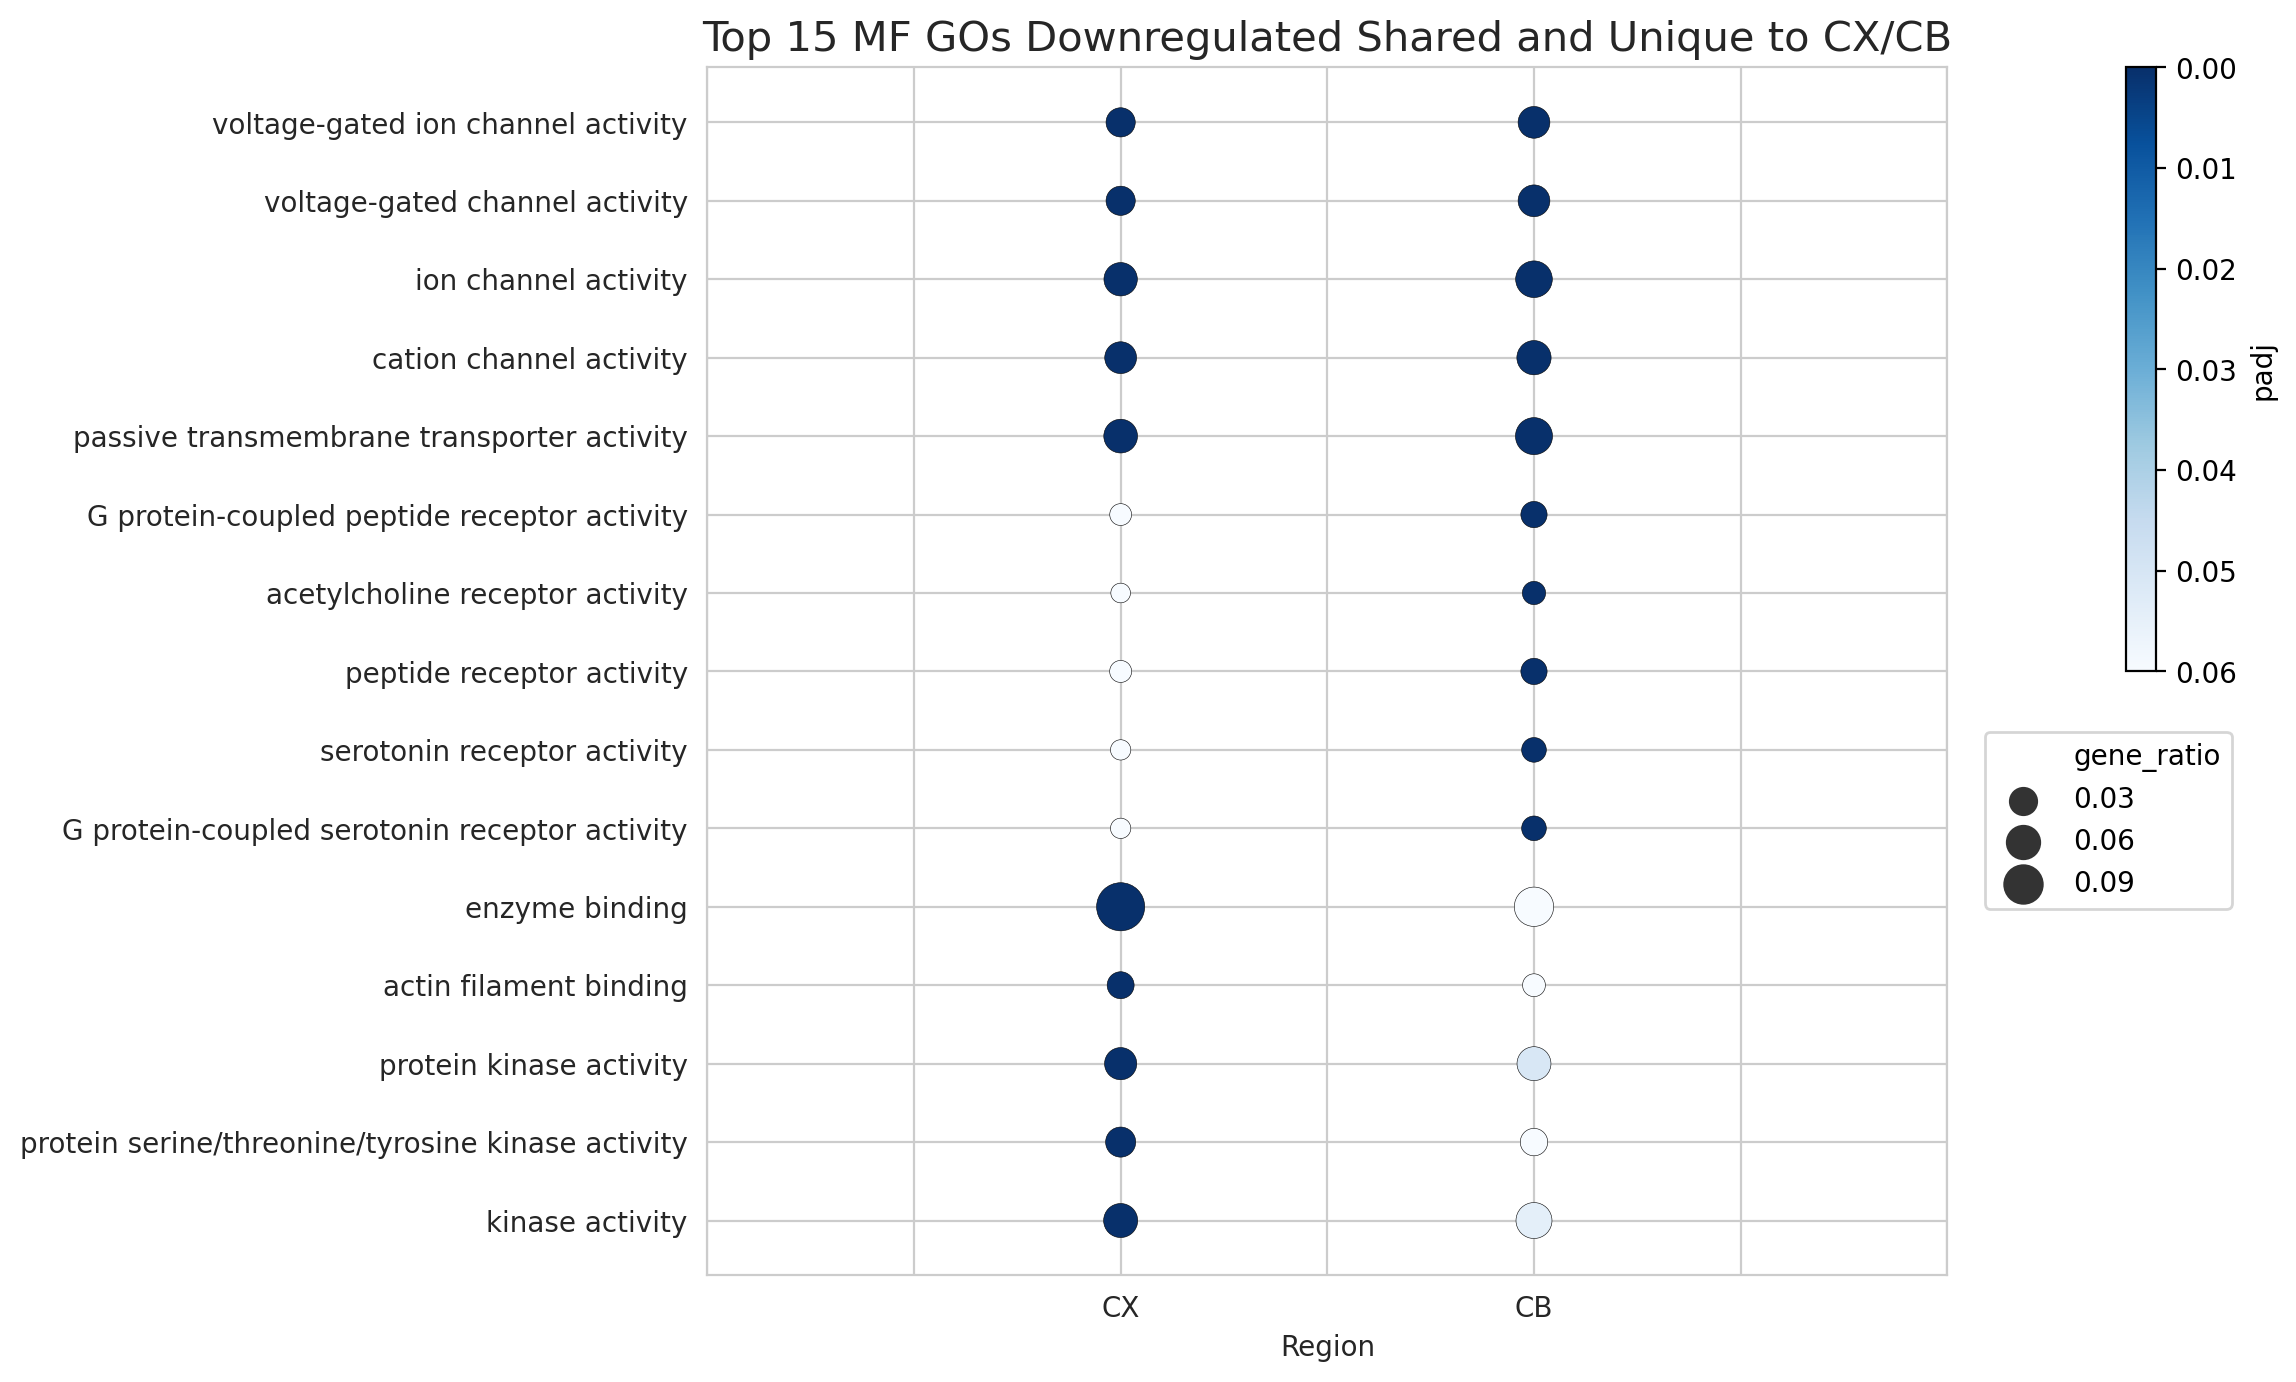

In [39]:
plt.figure(figsize=(10, 8), dpi=200)

norm = colors.Normalize(vmin=0, vmax=0.06)

with sns.axes_style('whitegrid'):
    ax = sns.scatterplot(data=mf_master, 
                         x="region", 
                         y="term_name", 
                         hue="adjusted_p_value", 
                         size="gene_ratio", 
                         sizes=(50, 300),
                         style="analysis",
                         markers=["o", "o", "o"], 
                         palette="Blues_r", 
                         hue_norm=norm, 
                         edgecolor="black", 
                         linewidth=0.2)
    
sm = plt.cm.ScalarMappable(cmap="Blues_r", norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
cbar = ax.figure.colorbar(sm, label="padj", shrink=0.5, anchor=(0.5, 1.0), orientation='vertical') 
cbar.ax.invert_yaxis()

ax.set(xlim=(0, 3), xlabel='Region', ylabel="")
ax.set_xticklabels(['', '', 'CX', '', 'CB', '', ''])

# Set legend position to be outside of graph
h,l = ax.get_legend_handles_labels()
plt.legend(h[6:10], l[6:10], bbox_to_anchor=(1.03, 0.45), loc='upper left', borderaxespad=0)

# Set title of graph
plt.title("Top 15 MF GOs Downregulated Shared and Unique to CX/CB", size=15)

plt.savefig("Top_15_MF_GOs_Down_Shared_and_Unique.pdf", bbox_inches='tight')

plt.show(ax)

In [17]:
bp_unique_cx = bp_cx_cb_data[(bp_cx_cb_data.adjusted_p_value__CX_Down < 0.05) 
                       & (bp_cx_cb_data.adjusted_p_value__CB_Down >= 0.05)].sort_values(by="adjusted_p_value__CX_Down")
bp_unique_cx["region"] = "CX"
bp_unique_cx["analysis"] = "unique_cx"
print(bp_unique_cx.shape)
bp_unique_cx.tail()

(714, 17)


,source,term_name,term_id,term_size,effective_domain_size,p_adj_color,adjusted_p_value__CX_Down,query_size__CX_Down,intersection_size__CX_Down,gene_ratio_CX_Down,p_adj_color.1,adjusted_p_value__CB_Down,query_size__CB_Down,intersection_size__CB_Down,gene_ratio_CB_Down,region,analysis
1158,GO:BP,trabecula morphogenesis,GO:0061383,53,27543,0.047157,0.047157,1722,13,0.007549,1.0,1.0,181,1,0.005525,CX,unique_cx
1159,GO:BP,social behavior,GO:0035176,57,27543,0.047361,0.047361,1591,13,0.008171,1.0,1.0,234,3,0.012821,CX,unique_cx
1160,GO:BP,regulation of protein targeting,GO:1903533,56,27543,0.048168,0.048168,939,10,0.010650,1.0,1.0,634,3,0.004732,CX,unique_cx
1161,GO:BP,regulation of RNA biosynthetic process,GO:2001141,3483,27543,0.048561,0.048561,1756,280,0.159453,1.0,1.0,186,32,0.172043,CX,unique_cx
1162,GO:BP,cellular response to peptide hormone stimulus,GO:0071375,311,27543,0.049643,0.049643,1750,40,0.022857,1.0,1.0,56,2,0.035714,CX,unique_cx


In [20]:
bp_unique_cx[1:16].to_csv("bp_unique_cx_down_long.csv")

In [40]:
bp_unique_cx_long = pd.read_csv("bp_unique_cx_down_long.csv")

/var/folders/4w/6x4glmd95f97_1j94ktzprrm0000gn/T/ipykernel_55335/447279486.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', '', 'CX', '', 'CB', '', ''])


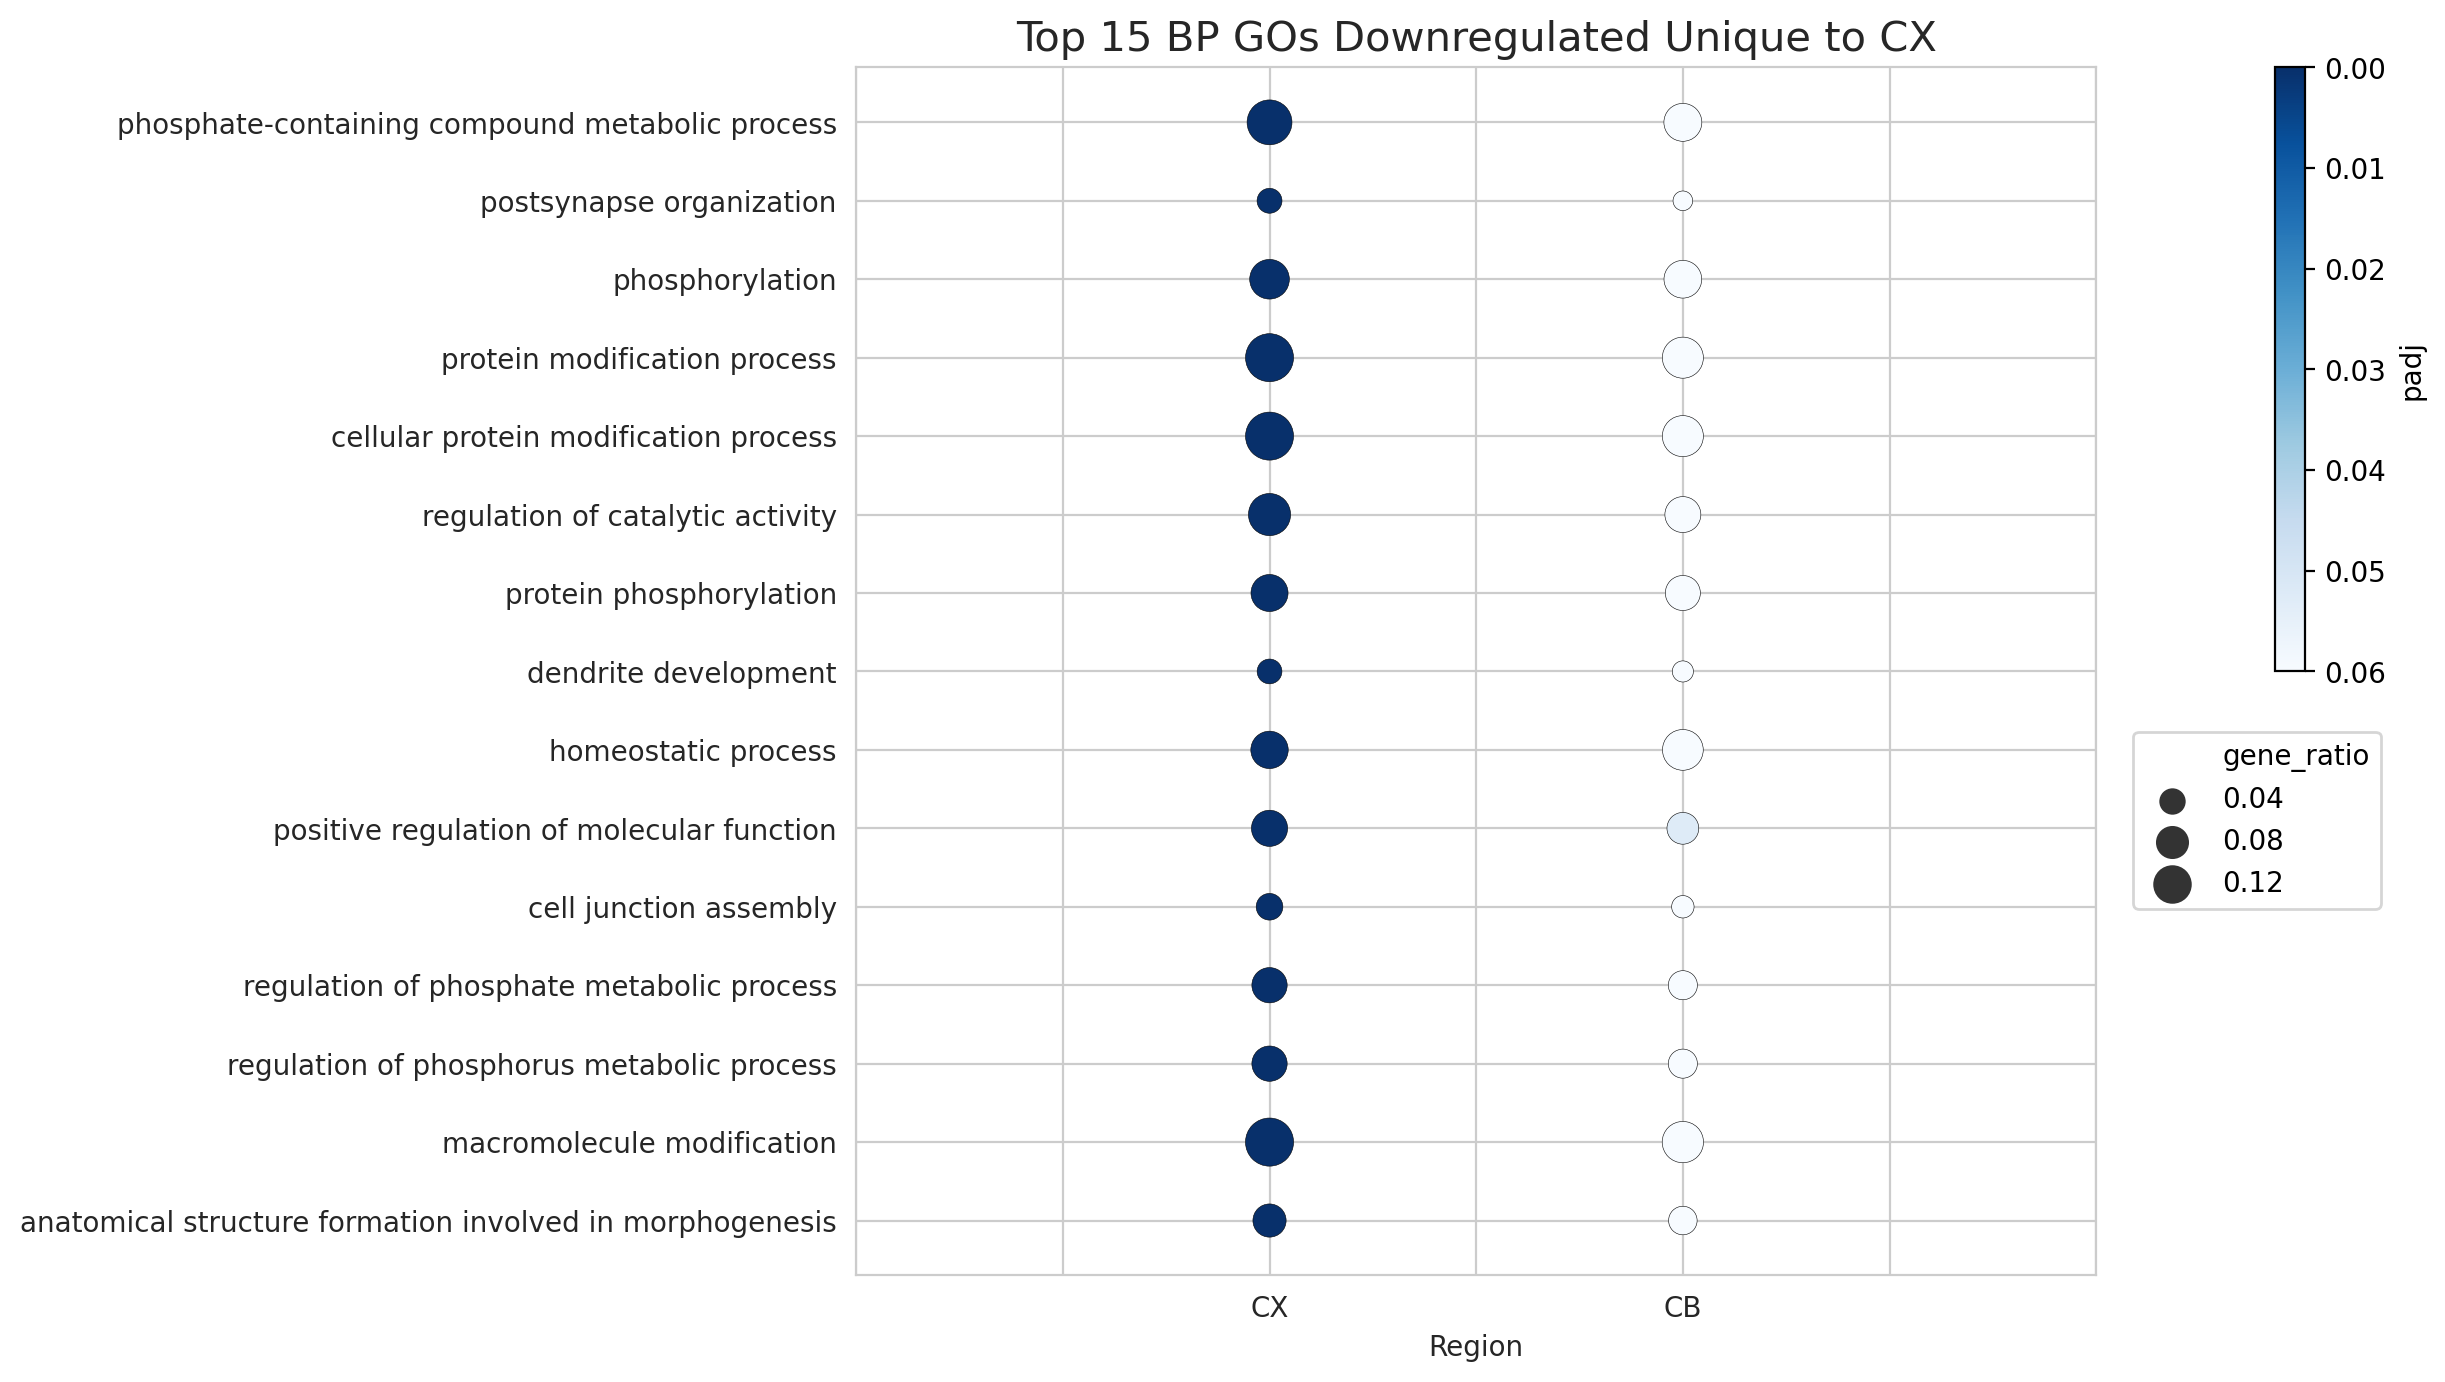

In [41]:
plt.figure(figsize=(10, 8), dpi=200)

norm = colors.Normalize(vmin=0, vmax=0.06)

with sns.axes_style('whitegrid'):
    ax = sns.scatterplot(data=bp_unique_cx_long, 
                         x="region", 
                         y="term_name", 
                         hue="adjusted_p_value", 
                         size="gene_ratio", 
                         sizes=(50, 300), 
                         palette="Blues_r", 
                         hue_norm=norm, 
                         edgecolor="black", 
                         linewidth=0.2)
    
sm = plt.cm.ScalarMappable(cmap="Blues_r", norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
cbar = ax.figure.colorbar(sm, label="padj", shrink=0.5, anchor=(0.5, 1.0), orientation='vertical') 
cbar.ax.invert_yaxis()

ax.set(xlim=(0, 3), xlabel='Region', ylabel="")
ax.set_xticklabels(['', '', 'CX', '', 'CB', '', ''])

# Set legend position to be outside of graph
h,l = ax.get_legend_handles_labels()
plt.legend(h[6:10], l[6:10], bbox_to_anchor=(1.03, 0.45), loc='upper left', borderaxespad=0)

# Set title of graph
plt.title("Top 15 BP GOs Downregulated Unique to CX", size=15)

plt.savefig('Top_15_BP_GOs_Down_Unique_CX_CB.pdf', bbox_inches='tight')

plt.show(ax)

In [26]:
mf_unique_cx = mf_cx_cb_data[(mf_cx_cb_data.adjusted_p_value__CX_Down < 0.05) 
                       & (mf_cx_cb_data.adjusted_p_value__CB_Down >= 0.05)].sort_values(by="adjusted_p_value__CX_Down")
mf_unique_cx["region"] = "CX"
mf_unique_cx["analysis"] = "unique_cx"
print(mf_unique_cx.shape)
mf_unique_cx.head()

(119, 17)


,source,term_name,term_id,term_size,effective_domain_size,p_adj_color,adjusted_p_value__CX_Down,query_size__CX_Down,intersection_size__CX_Down,gene_ratio_CX_Down,p_adj_color.1,adjusted_p_value__CB_Down,query_size__CB_Down,intersection_size__CB_Down,gene_ratio_CB_Down,region,analysis
22,GO:MF,actin binding,GO:0003779,449,25412,8.820000e-20,8.820000e-20,1563,88,0.056302,0.720041,0.720041,850,28,0.032941,CX,unique_cx
25,GO:MF,enzyme binding,GO:0019899,2265,25412,9.980000e-19,9.980000e-19,1427,236,0.165382,1.000000,1.000000,741,75,0.101215,CX,unique_cx
32,GO:MF,actin filament binding,GO:0051015,215,25412,2.200000e-15,2.200000e-15,1662,54,0.032491,1.000000,1.000000,850,13,0.015294,CX,unique_cx
33,GO:MF,protein kinase activity,GO:0004672,594,25412,5.080000e-15,5.080000e-15,1730,101,0.058382,0.050594,0.050594,250,17,0.068000,CX,unique_cx
34,GO:MF,protein serine/threonine/tyrosine kinase activity,GO:0004712,430,25412,6.860000e-15,6.860000e-15,1730,82,0.047399,0.108891,0.108891,868,30,0.034562,CX,unique_cx


In [27]:
mf_unique_cx[1:16].to_csv("mf_unique_cx_down_long.csv")

In [4]:
mf_unique_cx_long = pd.read_csv("mf_unique_cx_down_long.csv")

/var/folders/4w/6x4glmd95f97_1j94ktzprrm0000gn/T/ipykernel_56802/1085927764.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', '', 'CX', '', 'CB', '', ''])


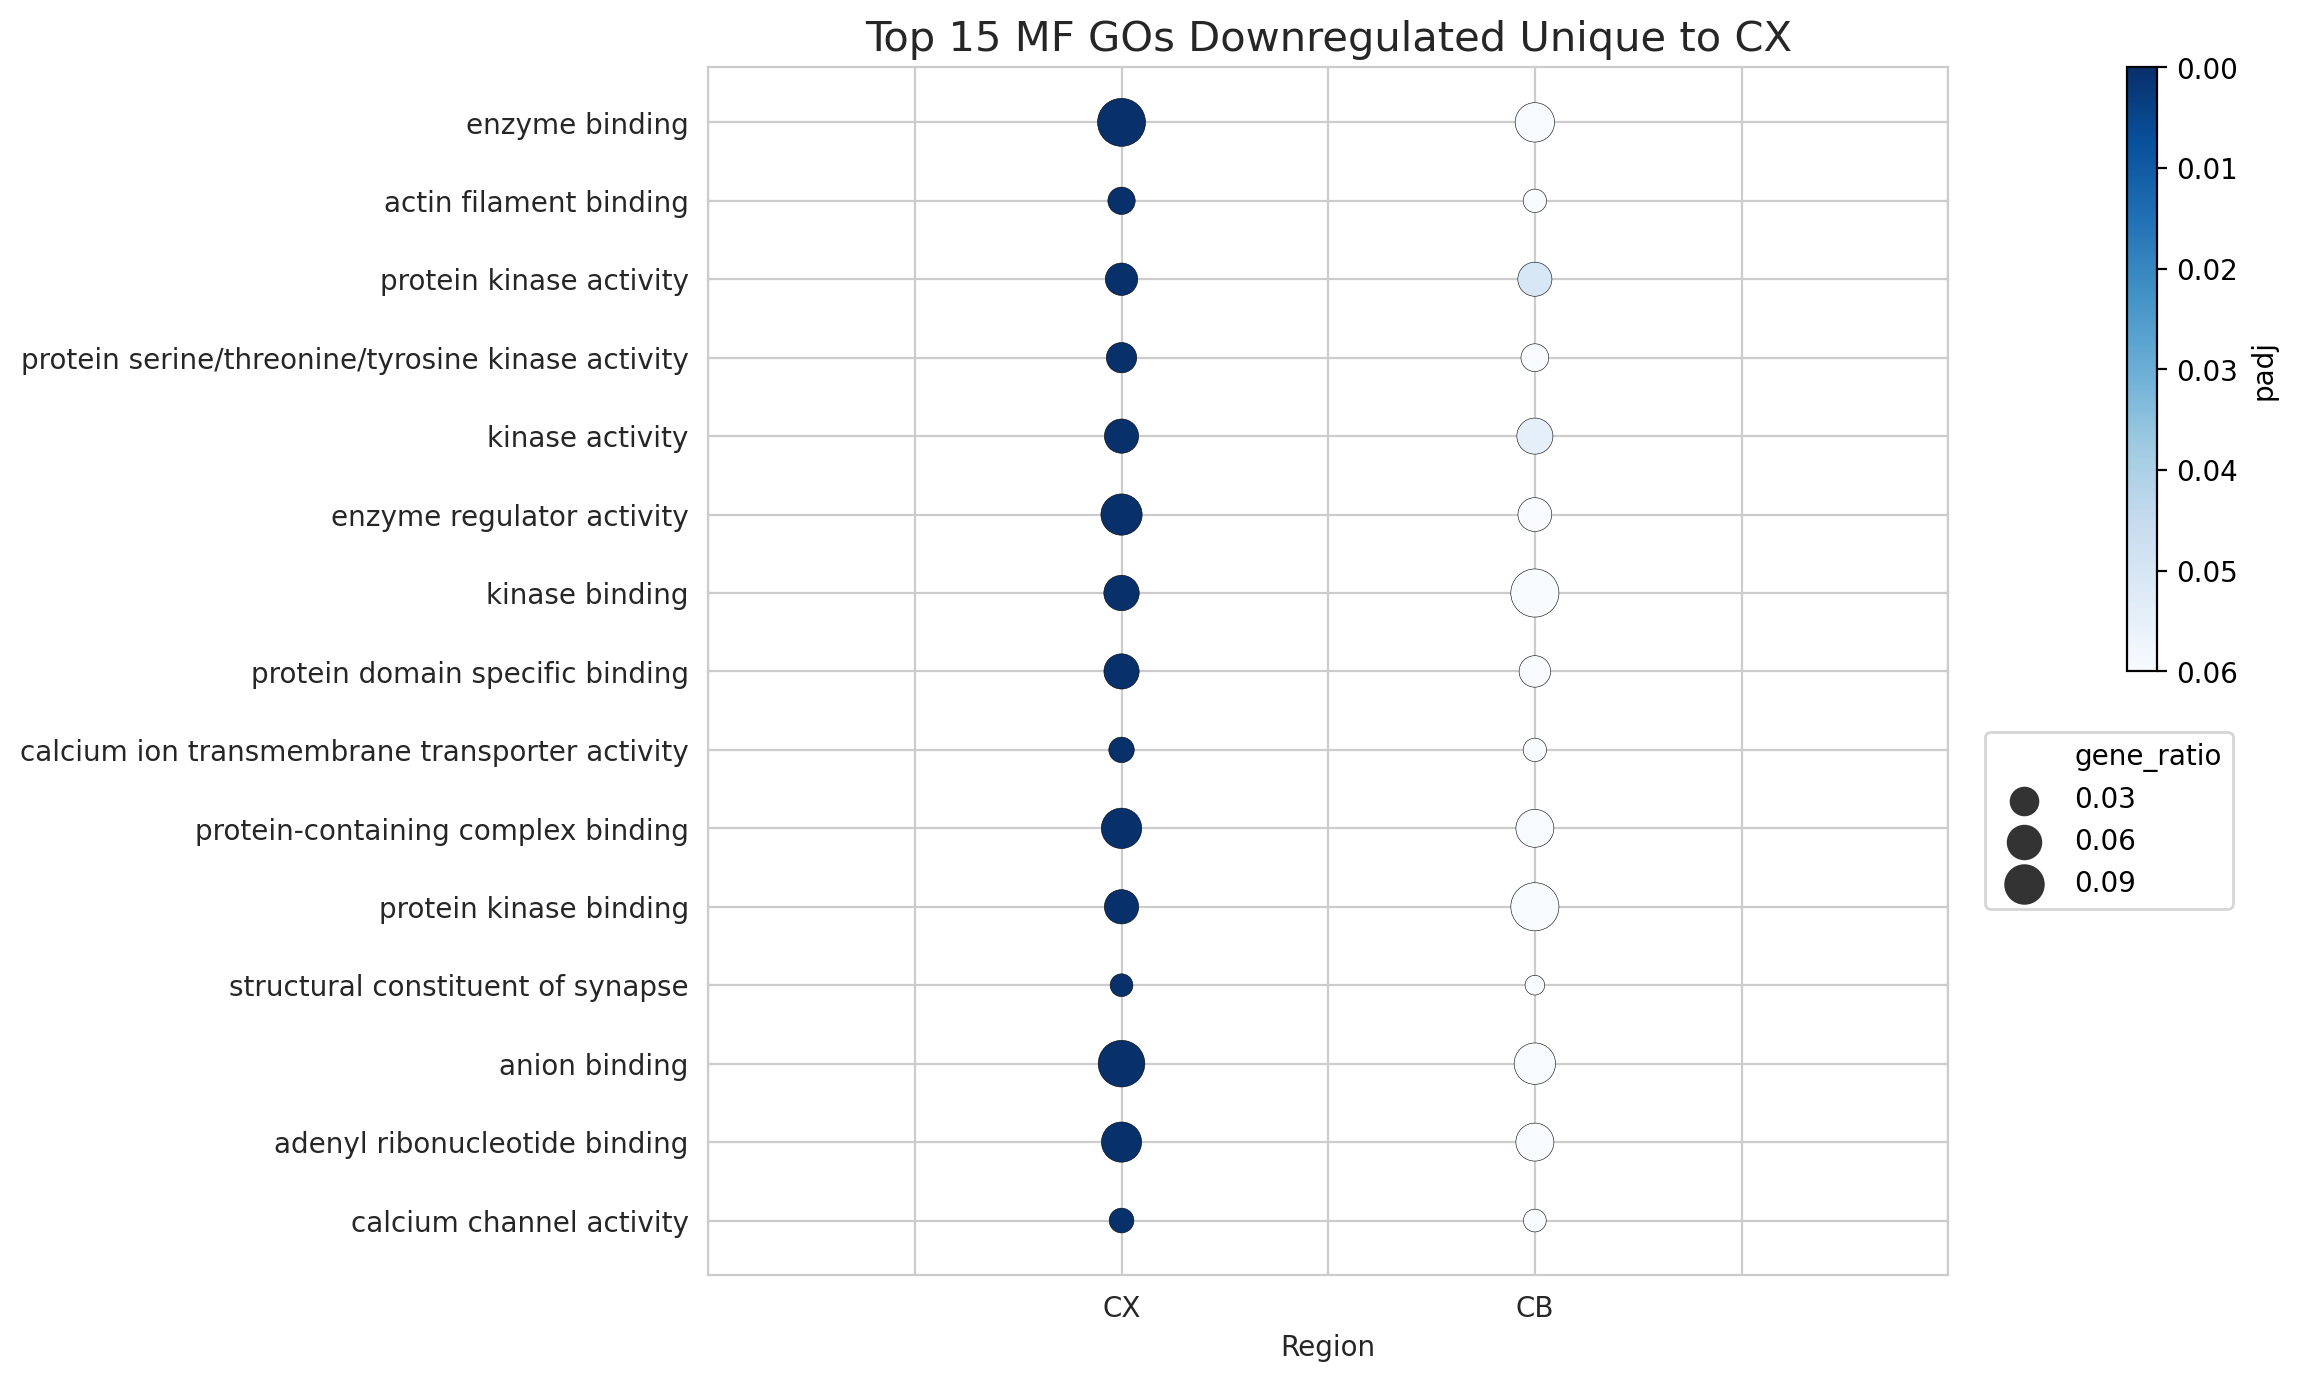

In [5]:
plt.figure(figsize=(10, 8), dpi=200)

norm = colors.Normalize(vmin=0, vmax=0.06)

with sns.axes_style('whitegrid'):
    ax = sns.scatterplot(data=mf_unique_cx_long, 
                         x="region", 
                         y="term_name", 
                         hue="adjusted_p_value", 
                         size="gene_ratio", 
                         sizes=(50, 300), 
                         palette="Blues_r", 
                         hue_norm=norm, 
                         edgecolor="black", 
                         linewidth=0.2)
    
sm = plt.cm.ScalarMappable(cmap="Blues_r", norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
cbar = ax.figure.colorbar(sm, label="padj", shrink=0.5, anchor=(0.5, 1.0), orientation='vertical') 
cbar.ax.invert_yaxis()

ax.set(xlim=(0, 3), xlabel='Region', ylabel="")
ax.set_xticklabels(['', '', 'CX', '', 'CB', '', ''])

# Set legend position to be outside of graph
h,l = ax.get_legend_handles_labels()
plt.legend(h[6:10], l[6:10], bbox_to_anchor=(1.03, 0.45), loc='upper left', borderaxespad=0)

# Set title of graph
plt.title("Top 15 MF GOs Downregulated Unique to CX", size=15)

plt.savefig("Top_15_MF_GOs_Down_Unique_CX_CB.pdf", bbox_inches='tight')

plt.show(ax)

In [33]:
bp_unique_cb = bp_cx_cb_data[(bp_cx_cb_data.adjusted_p_value__CB_Down < 0.05) 
                       & (bp_cx_cb_data.adjusted_p_value__CX_Down >= 0.05)].sort_values(by="adjusted_p_value__CB_Down")
bp_unique_cb["region"] = "CB"
bp_unique_cb["analysis"] = "unique_cb"
print(bp_unique_cb.shape)
bp_unique_cb.head()

(64, 17)


,source,term_name,term_id,term_size,effective_domain_size,p_adj_color,adjusted_p_value__CX_Down,query_size__CX_Down,intersection_size__CX_Down,gene_ratio_CX_Down,p_adj_color.1,adjusted_p_value__CB_Down,query_size__CB_Down,intersection_size__CB_Down,gene_ratio_CB_Down,region,analysis
225,GO:BP,neuropeptide signaling pathway,GO:0007218,107,27543,0.858437,0.858437,1708,17,0.009953,1.260000e-15,1.260000e-15,671,26,0.038748,CB,unique_cb
357,GO:BP,feeding behavior,GO:0007631,128,27543,0.334440,0.334440,1708,20,0.011710,6.450000e-10,6.450000e-10,577,21,0.036395,CB,unique_cb
497,GO:BP,phospholipase C-activating G protein-coupled r...,GO:0007200,98,27543,1.000000,1.000000,1736,12,0.006912,7.590000e-07,7.590000e-07,791,18,0.022756,CB,unique_cb
503,GO:BP,cellular response to dopamine,GO:1903351,88,27543,0.261425,0.261425,1352,14,0.010355,9.660000e-07,9.660000e-07,398,13,0.032663,CB,unique_cb
505,GO:BP,response to dopamine,GO:1903350,89,27543,0.296388,0.296388,1352,14,0.010355,1.120000e-06,1.120000e-06,398,13,0.032663,CB,unique_cb


In [34]:
bp_unique_cb[1:16].to_csv("bp_unique_cb_down_long.csv")

In [44]:
bp_unique_cb_long = pd.read_csv("bp_unique_cb_down_long.csv")

/var/folders/4w/6x4glmd95f97_1j94ktzprrm0000gn/T/ipykernel_55335/2242547688.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', '', 'CX', '', 'CB', '', ''])


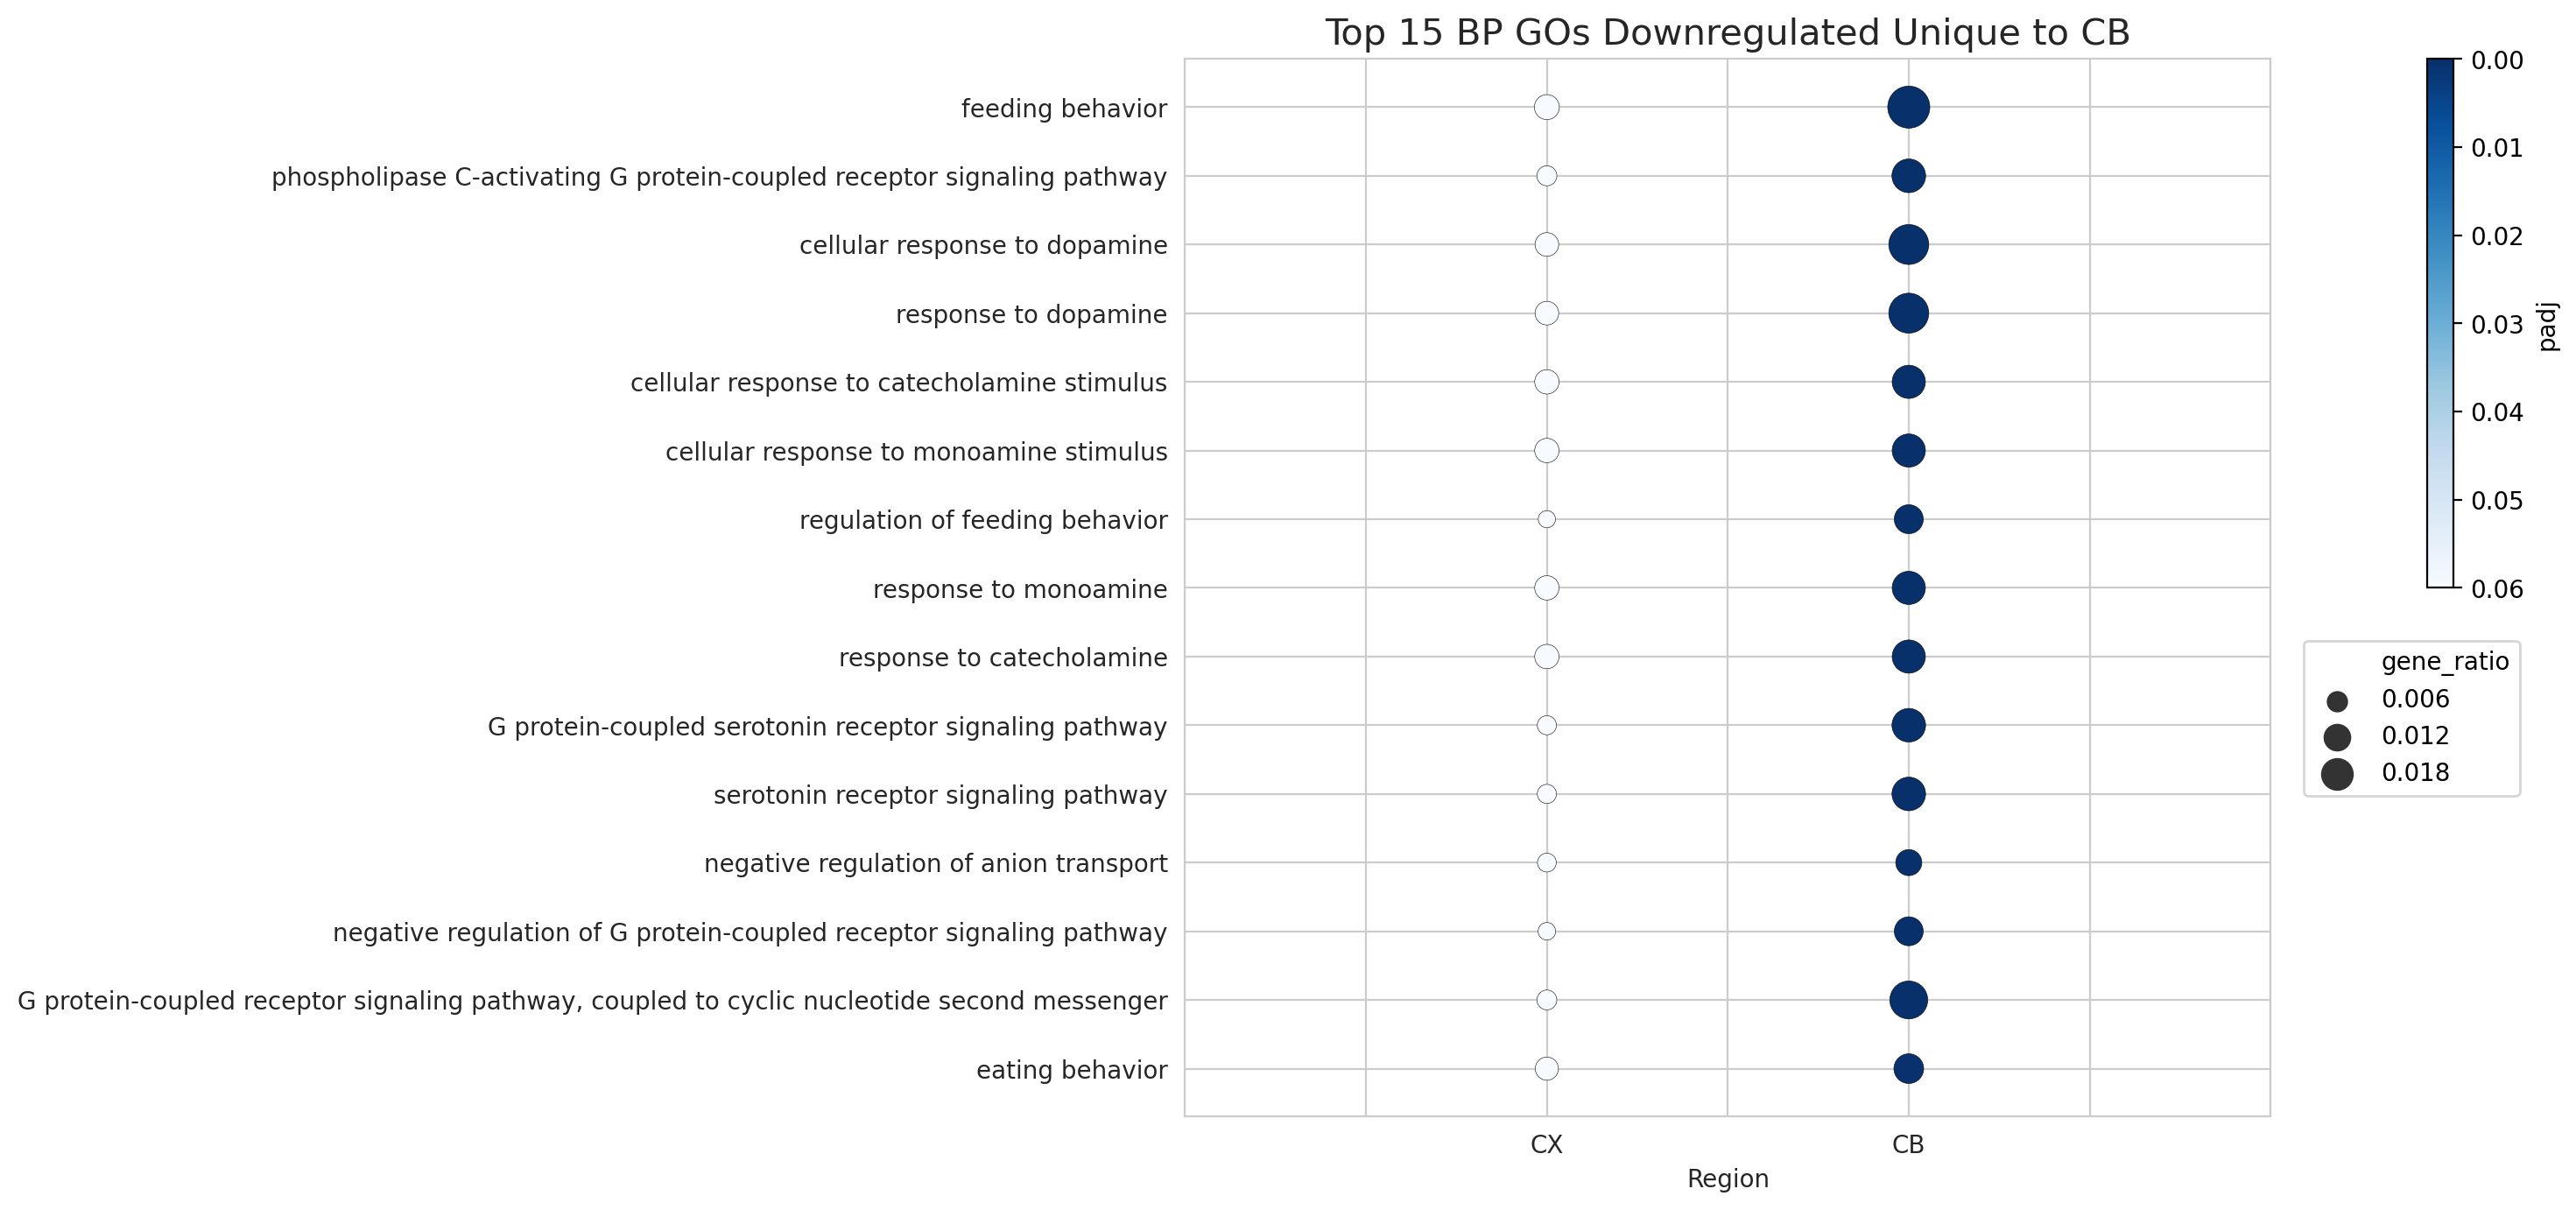

In [45]:
plt.figure(figsize=(10, 8), dpi=200)

norm = colors.Normalize(vmin=0, vmax=0.06)

with sns.axes_style('whitegrid'):
    ax = sns.scatterplot(data=bp_unique_cb_long, 
                         x="region", 
                         y="term_name", 
                         hue="adjusted_p_value", 
                         size="gene_ratio", 
                         sizes=(50, 300), 
                         palette="Blues_r", 
                         hue_norm=norm, 
                         edgecolor="black", 
                         linewidth=0.2)
    
sm = plt.cm.ScalarMappable(cmap="Blues_r", norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
cbar = ax.figure.colorbar(sm, label="padj", shrink=0.5, anchor=(0.5, 1.0), orientation='vertical') 
cbar.ax.invert_yaxis()

ax.set(xlim=(0, 3), xlabel='Region', ylabel="")
ax.set_xticklabels(['', '', 'CX', '', 'CB', '', ''])

# Set legend position to be outside of graph
h,l = ax.get_legend_handles_labels()
plt.legend(h[6:10], l[6:10], bbox_to_anchor=(1.03, 0.45), loc='upper left', borderaxespad=0)

# Set title of graph
plt.title("Top 15 BP GOs Downregulated Unique to CB", size=15)

plt.savefig("Top_15_BP_GOs_Down_Unique_CB_CX.pdf", bbox_inches='tight')

plt.show(ax)

In [38]:
mf_unique_cb = mf_cx_cb_data[(mf_cx_cb_data.adjusted_p_value__CB_Down < 0.05) 
                       & (mf_cx_cb_data.adjusted_p_value__CX_Down >= 0.05)].sort_values(by="adjusted_p_value__CB_Down")
mf_unique_cb["region"] = "CB"
mf_unique_cb["analysis"] = "unique_cb"
print(mf_unique_cb.shape)
mf_unique_cb.head()

(26, 17)


,source,term_name,term_id,term_size,effective_domain_size,p_adj_color,adjusted_p_value__CX_Down,query_size__CX_Down,intersection_size__CX_Down,gene_ratio_CX_Down,p_adj_color.1,adjusted_p_value__CB_Down,query_size__CB_Down,intersection_size__CB_Down,gene_ratio_CB_Down,region,analysis
79,GO:MF,neuropeptide receptor activity,GO:0008188,44,25412,1.000000,1.000000,824,3,0.003641,5.120000e-08,5.120000e-08,852,14,0.016432,CB,unique_cb
82,GO:MF,G protein-coupled peptide receptor activity,GO:0008528,144,25412,1.000000,1.000000,1736,20,0.011521,1.560000e-07,1.560000e-07,751,22,0.029294,CB,unique_cb
85,GO:MF,acetylcholine receptor activity,GO:0015464,18,25412,0.796560,0.796560,1260,5,0.003968,2.950000e-07,2.950000e-07,476,8,0.016807,CB,unique_cb
90,GO:MF,peptide receptor activity,GO:0001653,153,25412,0.933363,0.933363,1736,21,0.012097,5.110000e-07,5.110000e-07,751,22,0.029294,CB,unique_cb
98,GO:MF,serotonin receptor activity,GO:0099589,39,25412,0.066887,0.066887,1620,10,0.006173,4.030000e-06,4.030000e-06,398,9,0.022613,CB,unique_cb


In [39]:
mf_unique_cb[1:16].to_csv("mf_unique_cb_down_long.csv")

In [7]:
mf_unique_cb_long = pd.read_csv("mf_unique_cb_down_long.csv")

/var/folders/4w/6x4glmd95f97_1j94ktzprrm0000gn/T/ipykernel_56802/2526946454.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', '', 'CX', '', 'CB', '', ''])


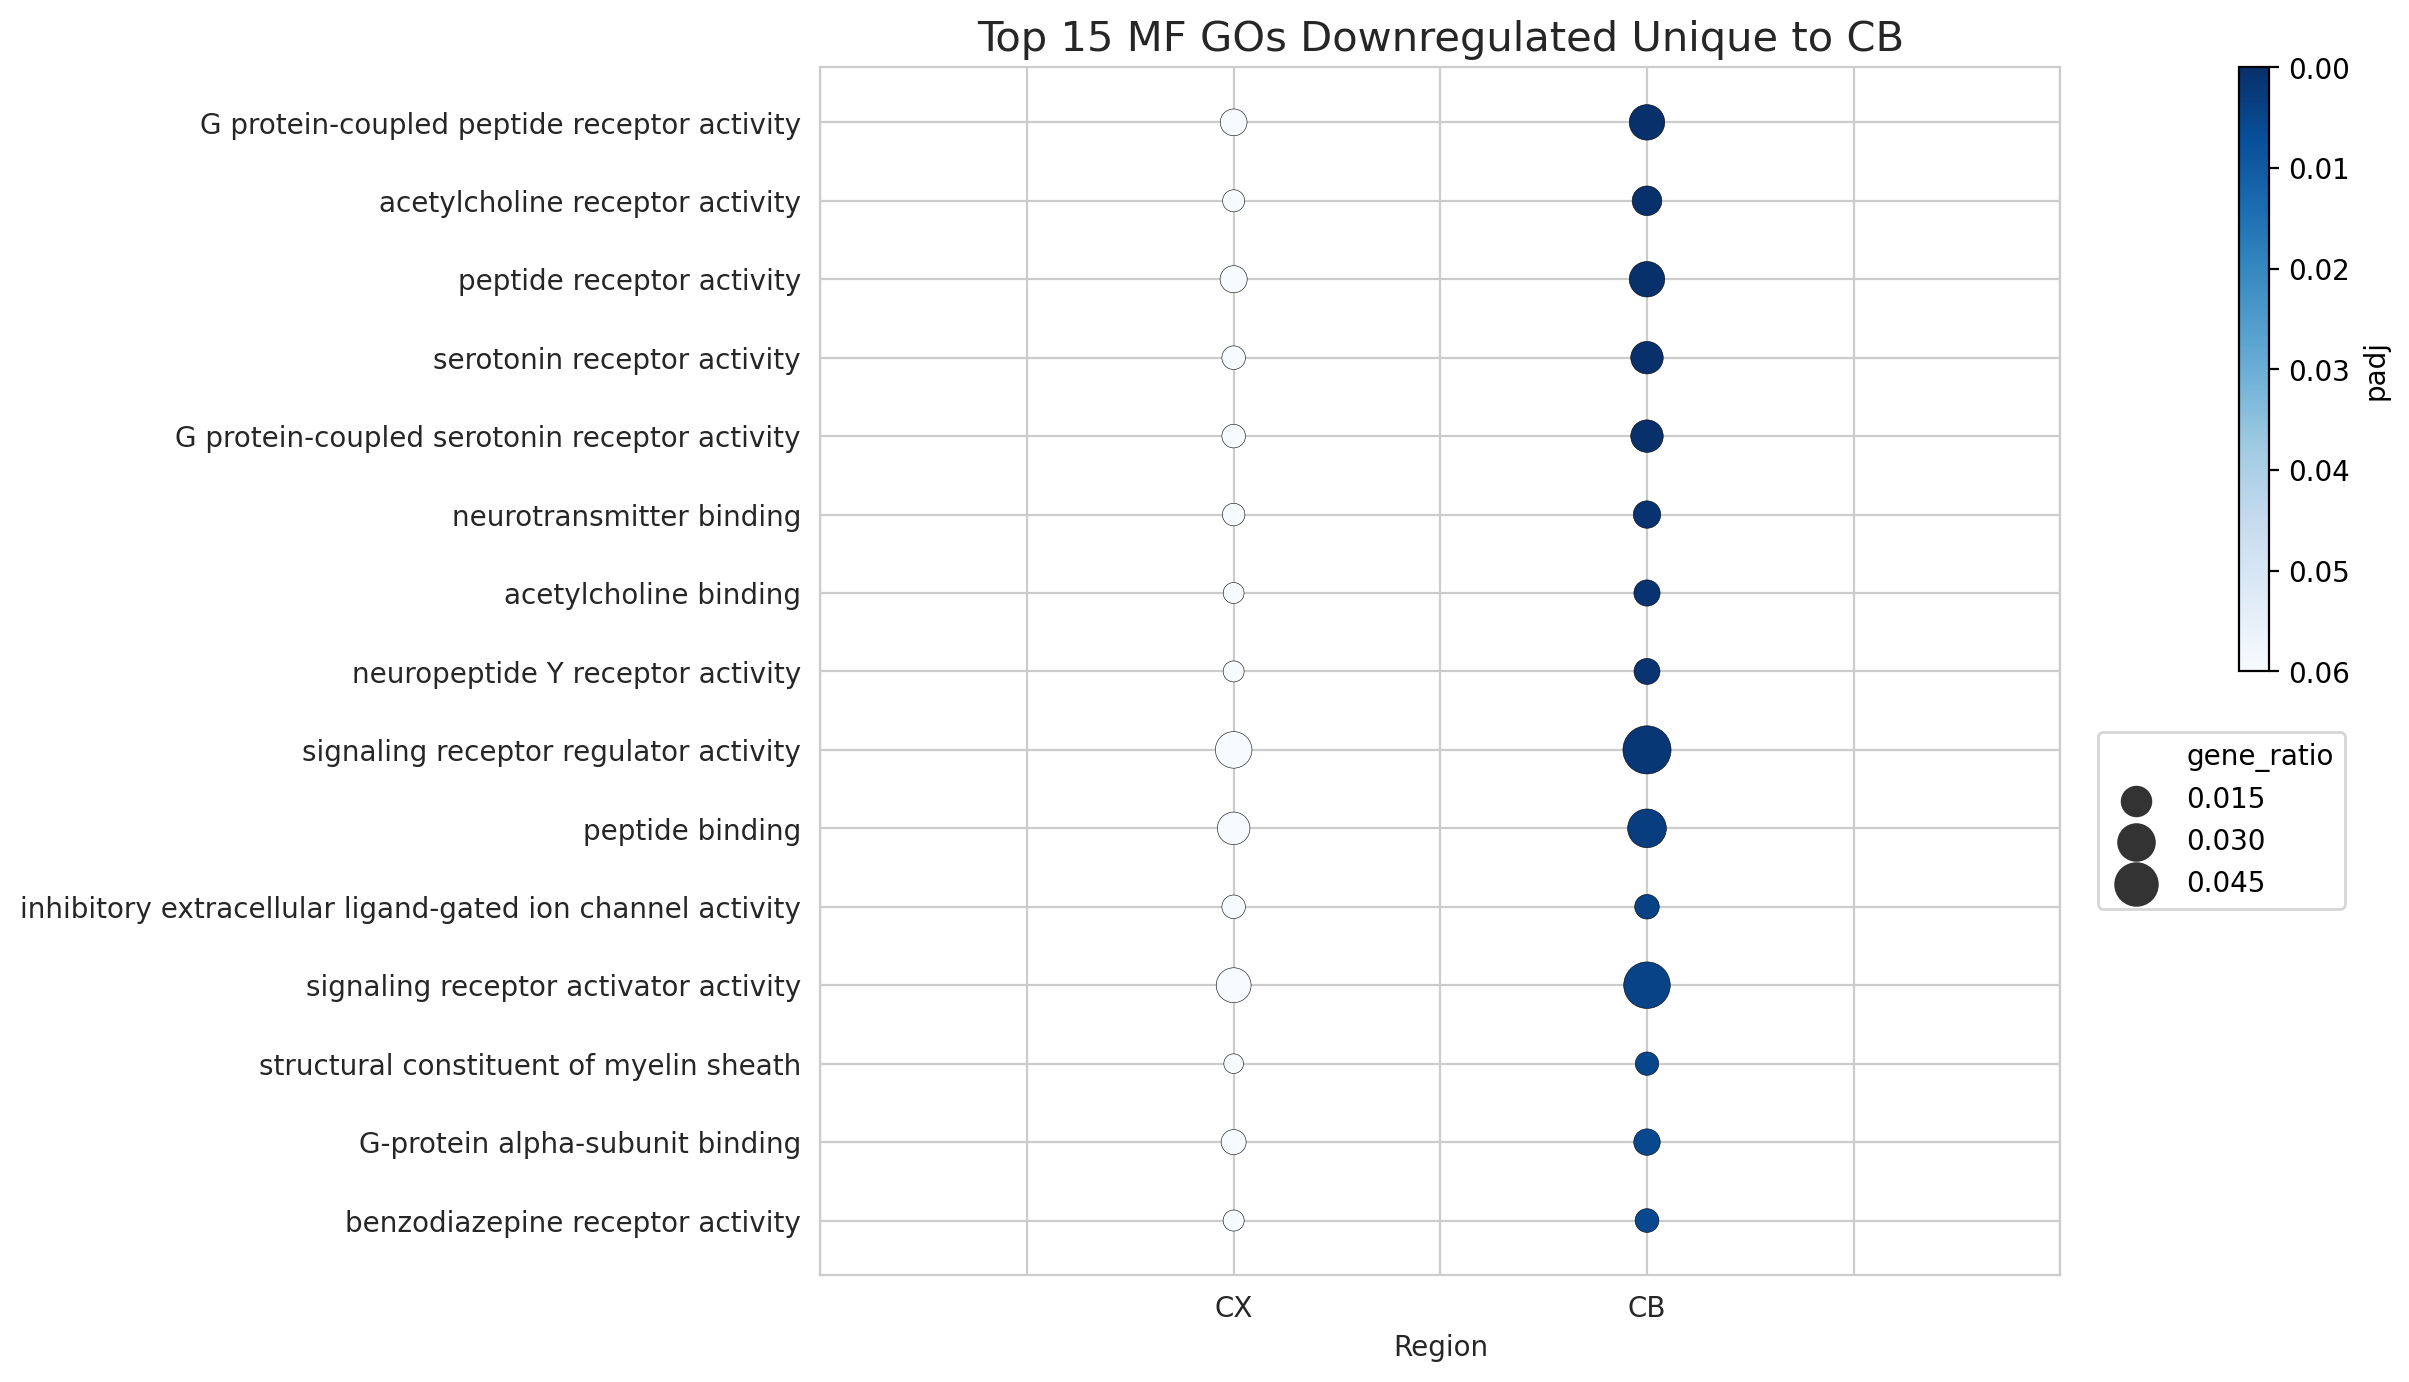

In [8]:
plt.figure(figsize=(10, 8), dpi=200)

norm = colors.Normalize(vmin=0, vmax=0.06)

with sns.axes_style('whitegrid'):
    ax = sns.scatterplot(data=mf_unique_cb_long, 
                         x="region", 
                         y="term_name", 
                         hue="adjusted_p_value", 
                         size="gene_ratio", 
                         sizes=(50, 300), 
                         palette="Blues_r", 
                         hue_norm=norm, 
                         edgecolor="black", 
                         linewidth=0.2)
    
sm = plt.cm.ScalarMappable(cmap="Blues_r", norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
cbar = ax.figure.colorbar(sm, label="padj", shrink=0.5, anchor=(0.5, 1.0), orientation='vertical') 
cbar.ax.invert_yaxis()

ax.set(xlim=(0, 3), xlabel='Region', ylabel="")
ax.set_xticklabels(['', '', 'CX', '', 'CB', '', ''])

# Set legend position to be outside of graph
h,l = ax.get_legend_handles_labels()
plt.legend(h[6:10], l[6:10], bbox_to_anchor=(1.03, 0.45), loc='upper left', borderaxespad=0)

# Set title of graph
plt.title("Top 15 MF GOs Downregulated Unique to CB", size=15)

plt.savefig('Top_15_MF_GOs_Down_Unique_CB_CX.pdf', bbox_inches='tight')

plt.show(ax)

In [47]:
bp_shared[1:16].to_csv("bp_shared_down_long.csv")

In [7]:
bp_shared_long = pd.read_csv("bp_shared_down_long.csv")

In [49]:
bp_shared_long.sort_values(by='adjusted_p_value')

,Unnamed: 0,source,term_name,term_id,term_size,effective_domain_size,p_adj_color,adjusted_p_value,query_size__CX_Down,intersection_size__CX_Down,gene_ratio,region,analysis
12,1,GO:BP,system development,GO:0048731,4533,27543,5.840000e-87,5.840000e-87,1756,624,0.355353,1,shared
4,2,GO:BP,nervous system development,GO:0007399,2479,27543,3.040000e-85,3.040000e-85,1693,419,0.247490,1,shared
6,5,GO:BP,regulation of localization,GO:0032879,2881,27543,2.790000e-77,2.790000e-77,1756,454,0.258542,1,shared
1,6,GO:BP,cell-cell signaling,GO:0007267,1690,27543,2.060000e-76,2.060000e-76,1397,289,0.206872,1,shared
14,7,GO:BP,regulation of biological quality,GO:0065008,4029,27543,6.950000e-76,6.950000e-76,1756,557,0.317198,1,shared
0,14,GO:BP,trans-synaptic signaling,GO:0099537,864,27543,1.140000e-69,1.140000e-69,1416,196,0.138418,1,shared
3,17,GO:BP,chemical synaptic transmission,GO:0007268,856,27543,2.930000e-67,2.930000e-67,1416,192,0.135593,1,shared
2,16,GO:BP,anterograde trans-synaptic signaling,GO:0098916,856,27543,2.930000e-67,2.930000e-67,1416,192,0.135593,1,shared
7,23,GO:BP,regulation of transport,GO:0051049,1872,27543,8.220000e-60,8.220000e-60,1432,283,0.197626,1,shared
9,33,GO:BP,modulation of chemical synaptic transmission,GO:0050804,645,27543,2.740000e-55,2.740000e-55,1416,152,0.107345,1,shared


/var/folders/4w/6x4glmd95f97_1j94ktzprrm0000gn/T/ipykernel_55335/2414512852.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', '', 'CX', '', 'CB', '', ''])


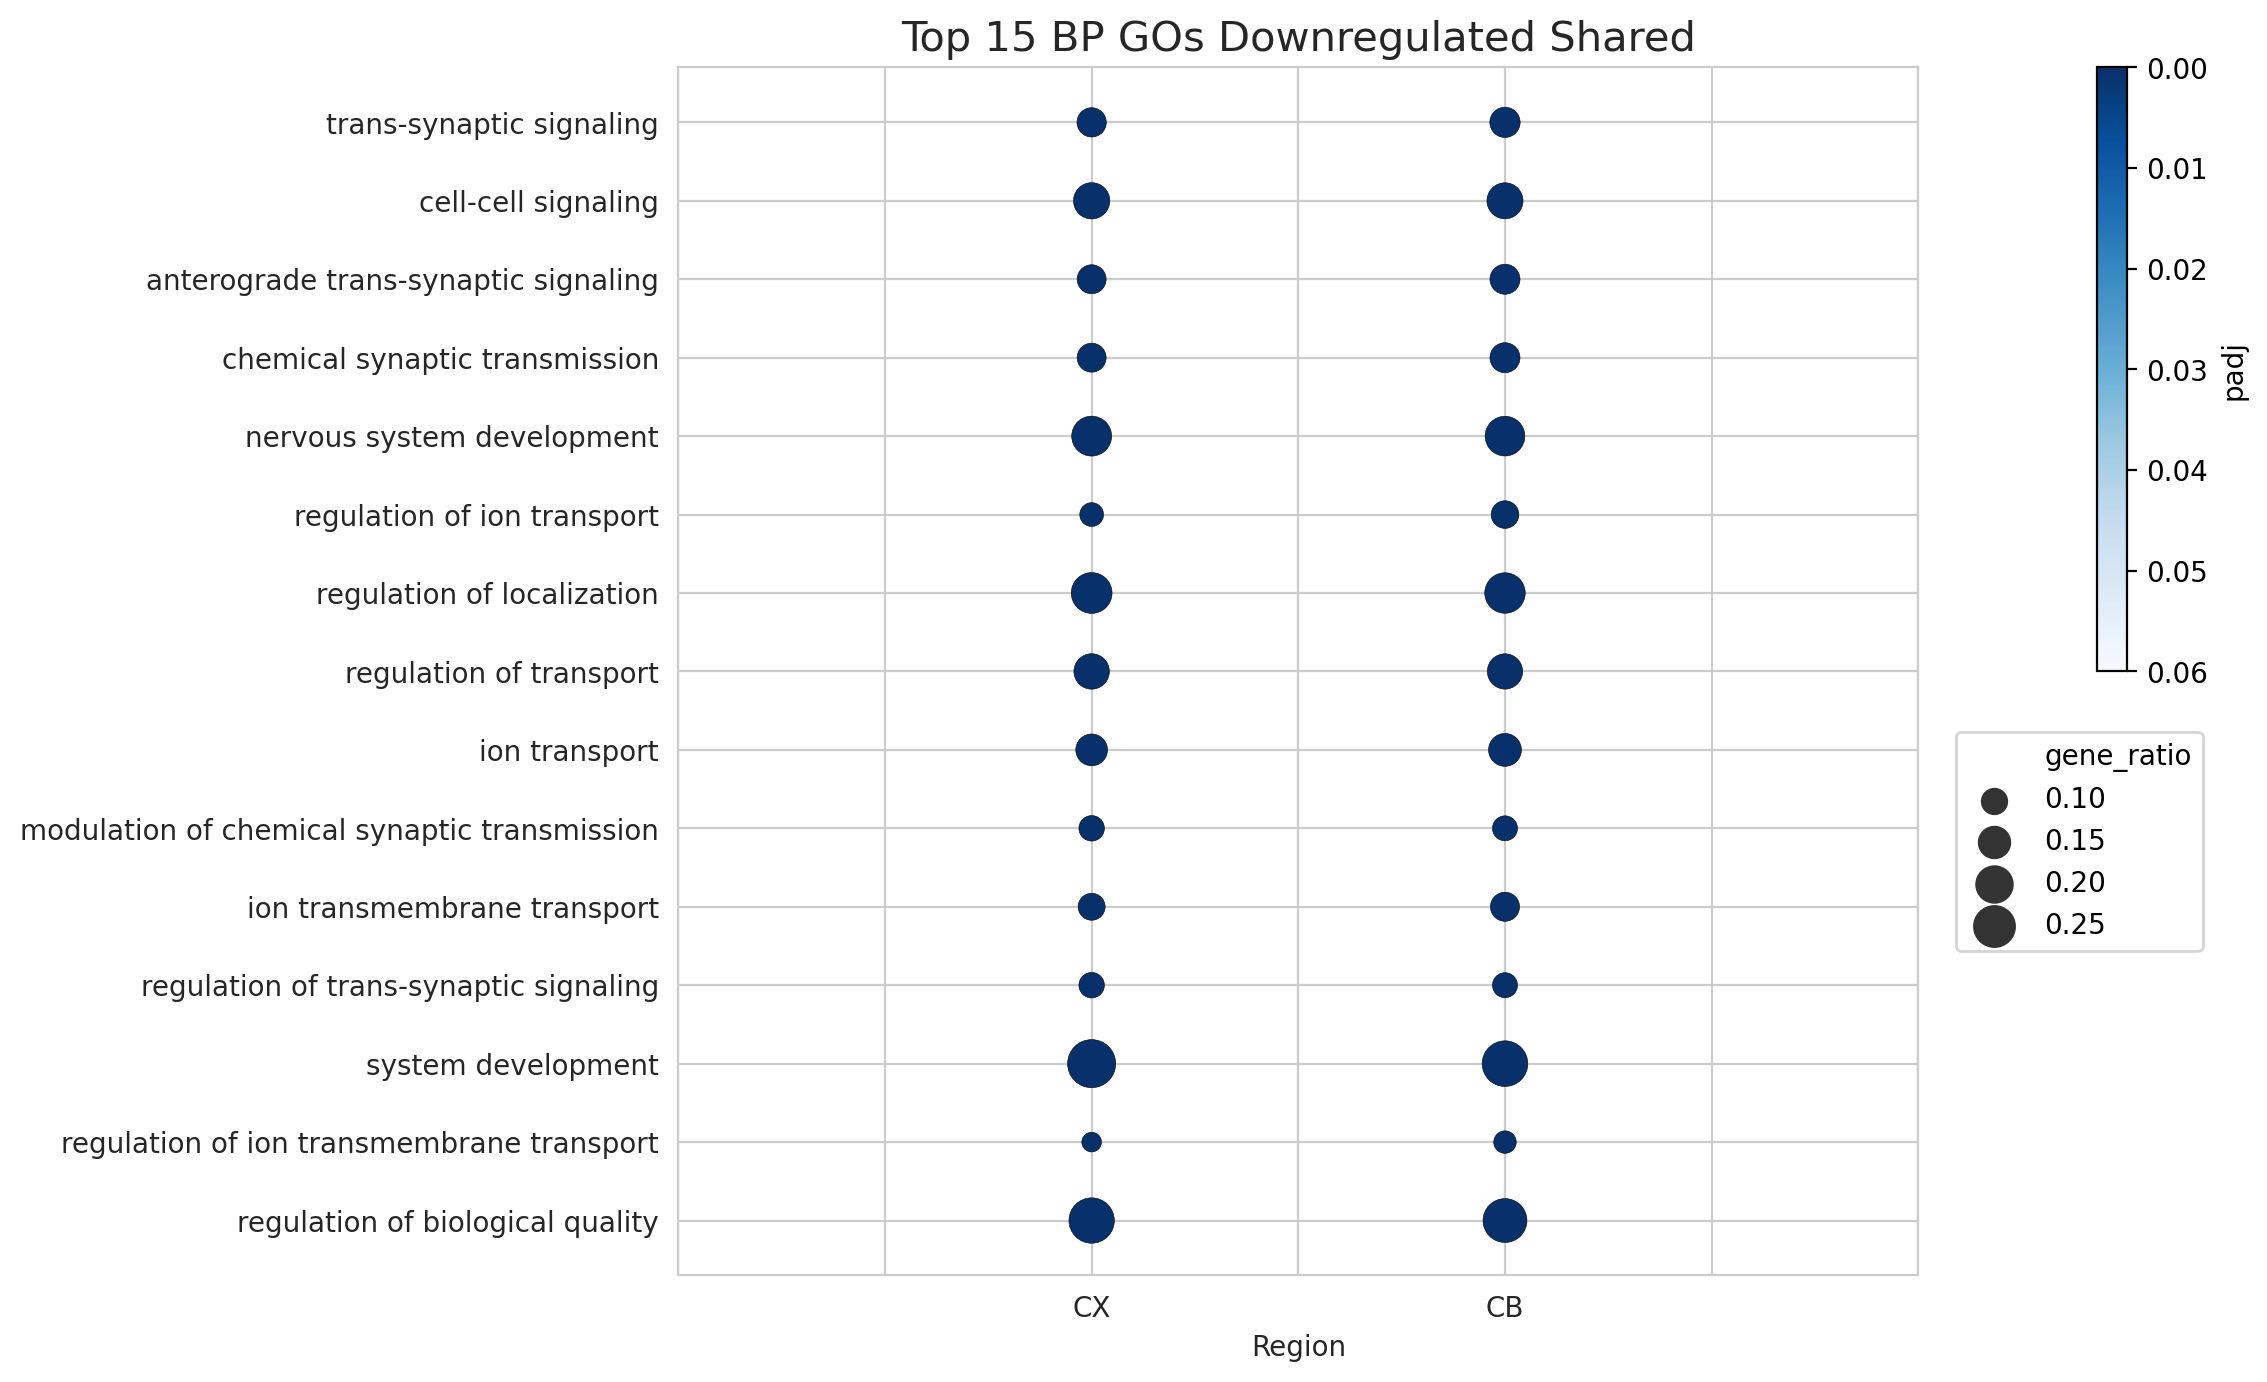

In [51]:
plt.figure(figsize=(10, 8), dpi=200)

norm = colors.Normalize(vmin=0, vmax=0.06)

with sns.axes_style('whitegrid'):
    ax = sns.scatterplot(data=bp_shared_long, 
                         x="region", 
                         y="term_name", 
                         hue="adjusted_p_value", 
                         size="gene_ratio", 
                         sizes=(50, 300), 
                         palette="Blues_r", 
                         hue_norm=norm,
                         edgecolor="black", 
                         linewidth=0.2)
    
sm = plt.cm.ScalarMappable(cmap="Blues_r", norm=norm)
sm.set_array([])

# # Remove the legend and add a colorbar
cbar = ax.figure.colorbar(sm, label="padj", shrink=0.5, anchor=(0.5, 1.0), orientation='vertical') 
cbar.ax.invert_yaxis()

ax.set(xlim=(0, 3), xlabel='Region', ylabel="")
ax.set_xticklabels(['', '', 'CX', '', 'CB', '', ''])

# Set legend position to be outside of graph
h,l = ax.get_legend_handles_labels()
plt.legend(h[5:10], l[5:10], bbox_to_anchor=(1.03, 0.45), loc='upper left', borderaxespad=0)

# Set title of graph
plt.title("Top 15 BP GOs Downregulated Shared", size=15)

plt.savefig('Top_15_BP_GOs_Down_Shared_CX_CB.pdf', bbox_inches='tight')

plt.show(ax)

In [55]:
mf_shared[1:16].to_csv("mf_shared_down_long.csv")

In [52]:
mf_shared_long = pd.read_csv("mf_shared_down_long.csv")

/var/folders/4w/6x4glmd95f97_1j94ktzprrm0000gn/T/ipykernel_55335/3088931366.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', '', 'CX', '', 'CB', '', ''])


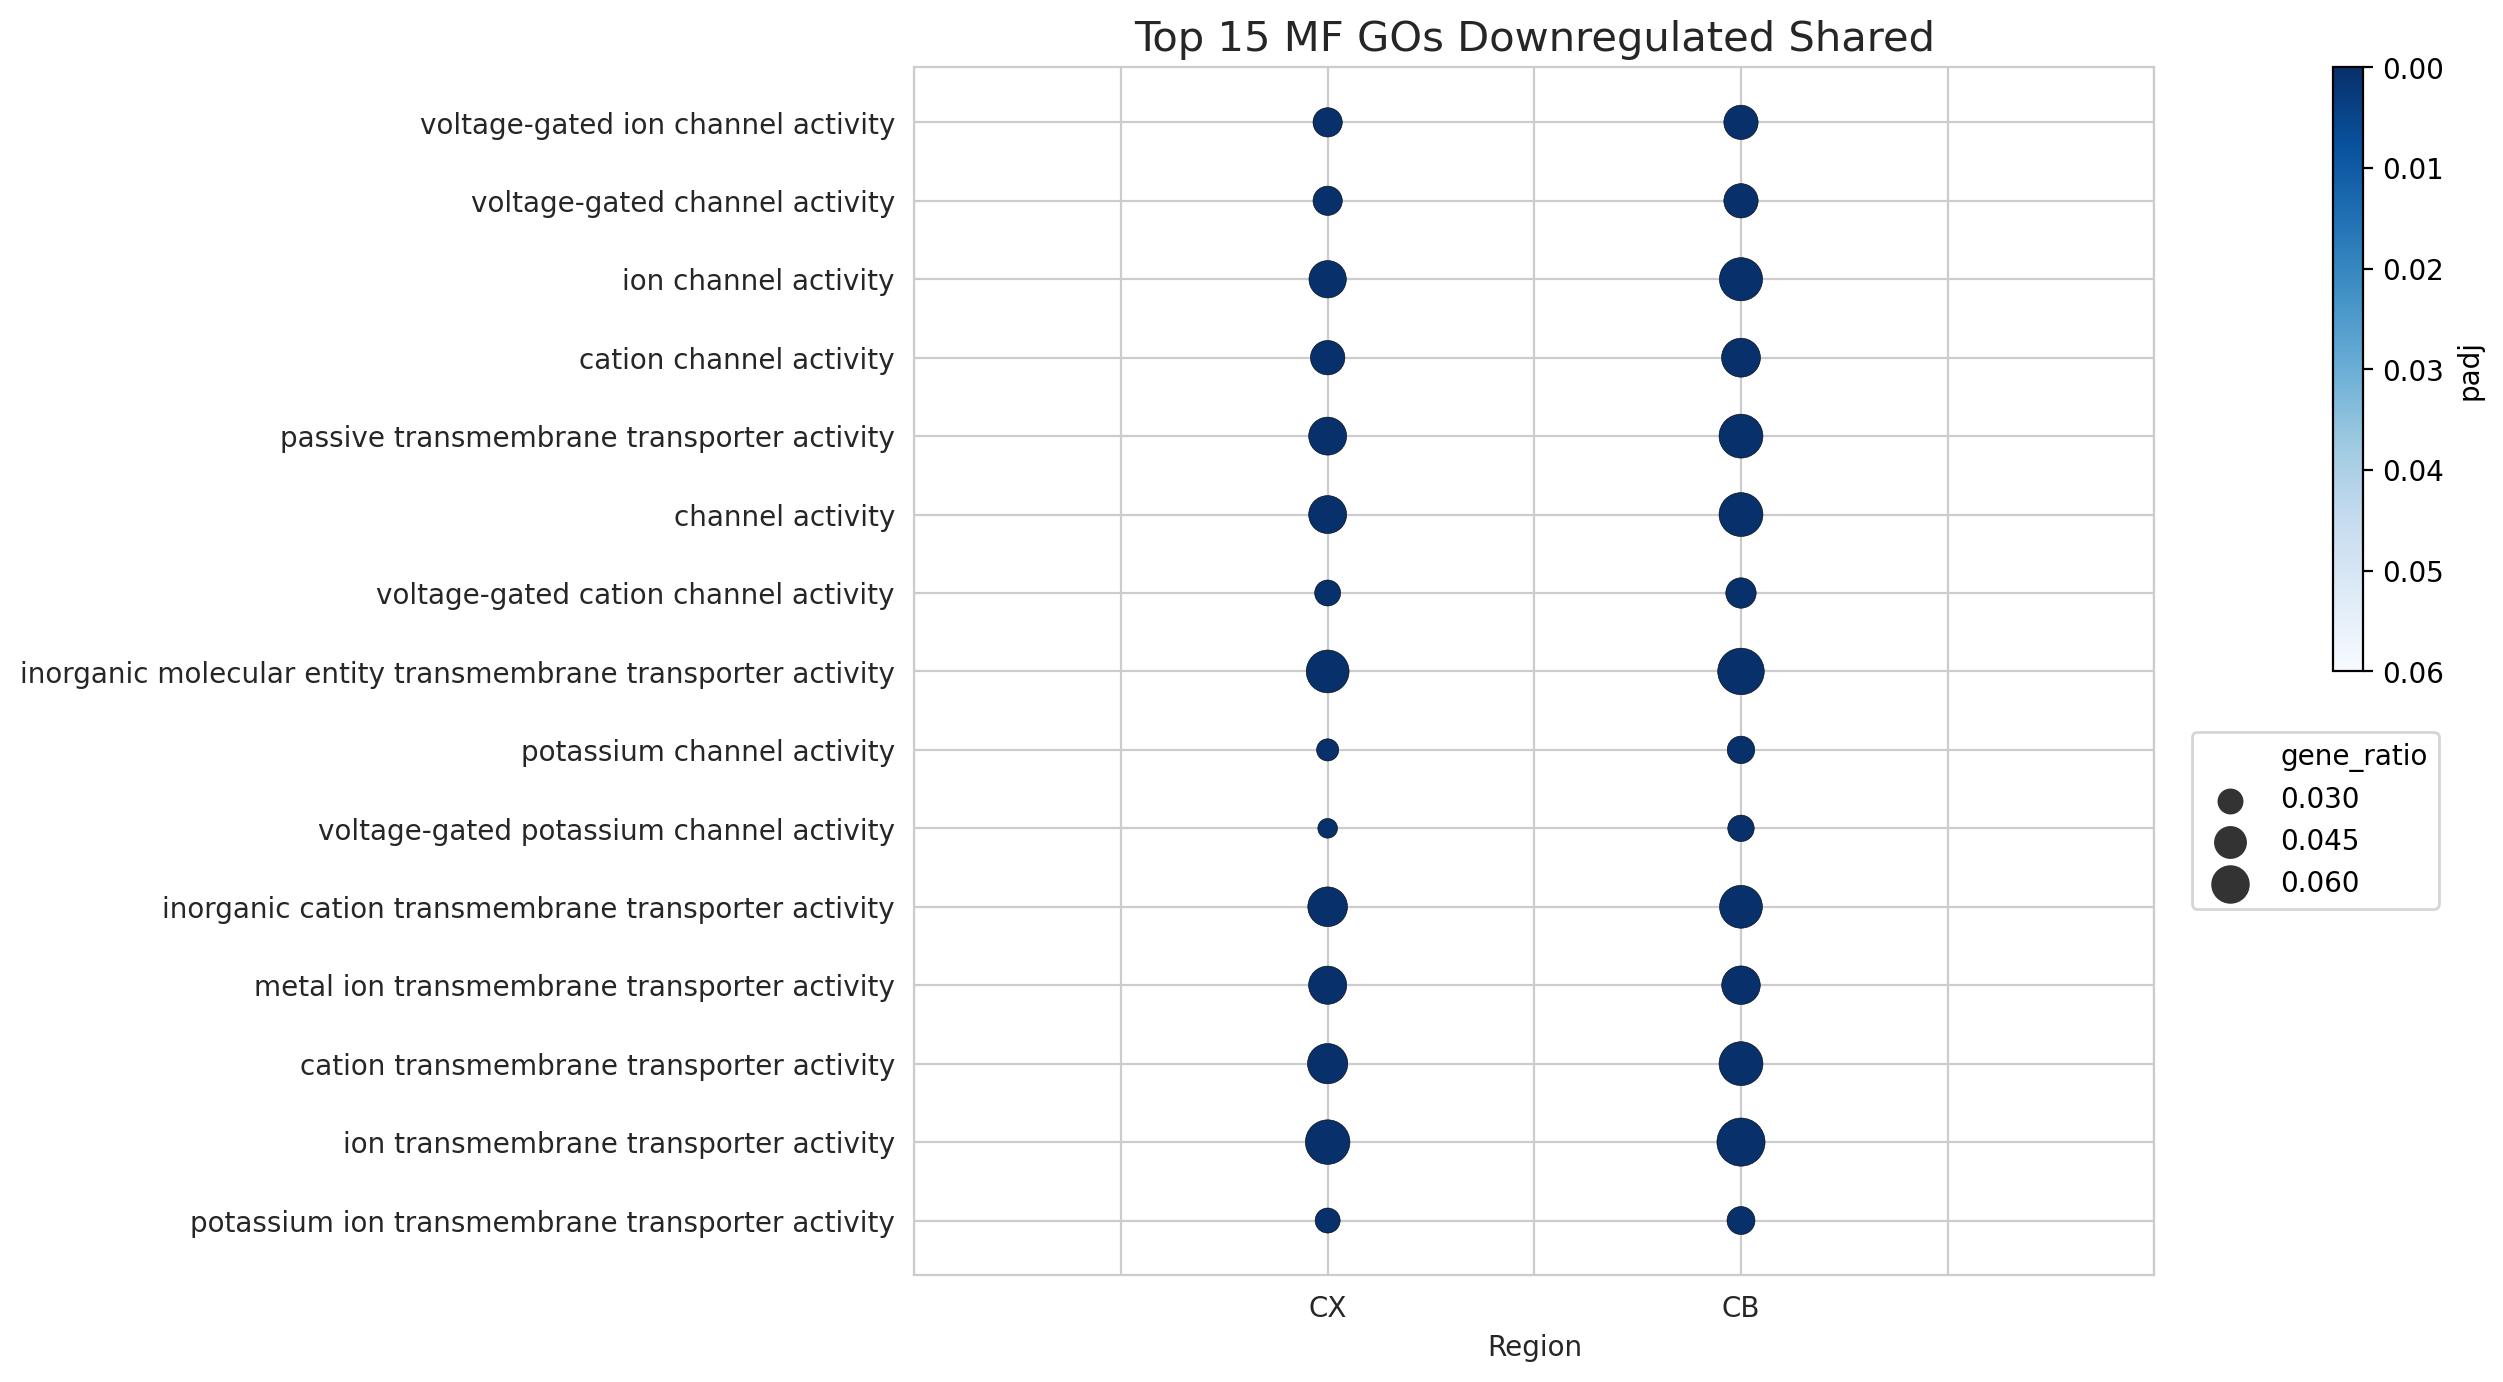

In [53]:
plt.figure(figsize=(10, 8), dpi=200)

norm = colors.Normalize(vmin=0, vmax=0.06)

with sns.axes_style('whitegrid'):
    ax = sns.scatterplot(data=mf_shared_long, 
                         x="region", 
                         y="term_name", 
                         hue="adjusted_p_value", 
                         size="gene_ratio", 
                         sizes=(50, 300), 
                         palette="Blues_r", 
                         hue_norm=norm, 
                         edgecolor="black", 
                         linewidth=0.2)
    
sm = plt.cm.ScalarMappable(cmap="Blues_r", norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
cbar = ax.figure.colorbar(sm, label="padj", shrink=0.5, anchor=(0.5, 1.0), orientation='vertical') 
cbar.ax.invert_yaxis()

ax.set(xlim=(0, 3), xlabel='Region', ylabel="")
ax.set_xticklabels(['', '', 'CX', '', 'CB', '', ''])

# Set legend position to be outside of graph
h,l = ax.get_legend_handles_labels()
plt.legend(h[6:10], l[6:10], bbox_to_anchor=(1.03, 0.45), loc='upper left', borderaxespad=0)

# Set title of graph
plt.title("Top 15 MF GOs Downregulated Shared", size=15)

plt.savefig('Top_15_MF_GOs_Down_Shared_CX_CB.pdf', bbox_inches='tight')

plt.show(ax)